<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
Fill in student names below, then remove the highlighting by deleting the code style.  

Diana Lee (28950384)  
Evie Xu (75527671) 


---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data
Create a time series object of the energy use. See the steps on Canvas if you aren't sure how to create a time series object in R.

In [4]:
energy_use <- read.csv("Energy use at YVR.csv")
energy_ts <- ts(energy_use$energy, start=c(1997, 1), frequency = 12)


### Time plot (0.5 marks)
Create a time plot of the electricity use data. Prepare this plot as if for publication and upload the image to Canvas. You do not have to describe the plot.

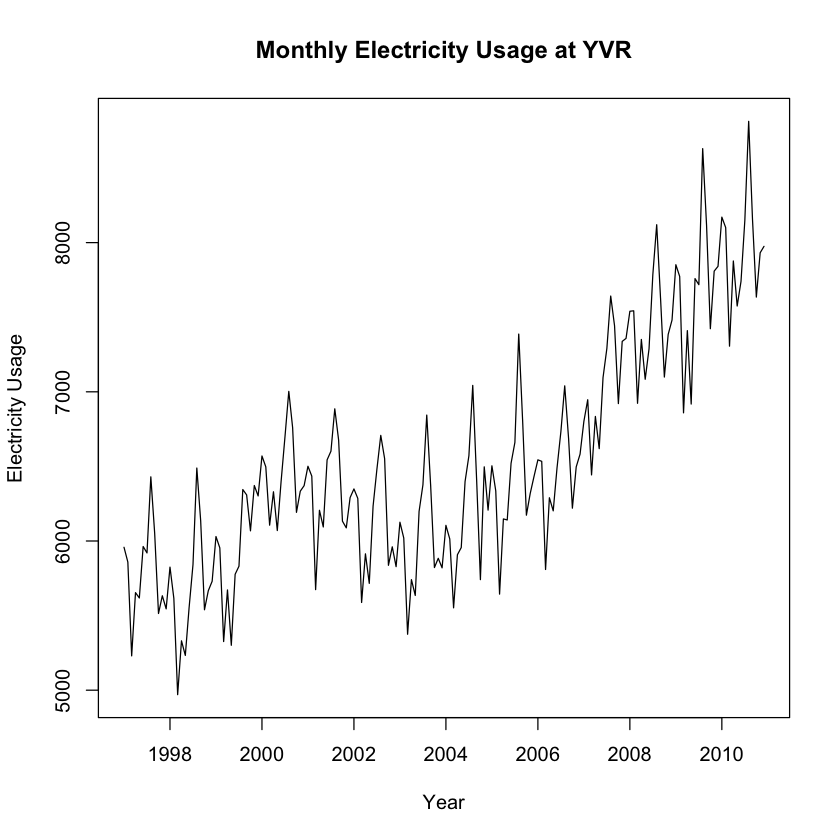

In [6]:
plot(energy_ts, xlab = "Year", ylab = "Electricity Usage", main = "Monthly Electricity Usage at YVR")


### Box-Cox transformation (1 mark)
Write the code to do a Box-Cox transformation of the electricity use data (this will be submitted as part of the last question for Part A of the project).

Create a time plot of the transformed data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using the Box-Cox transformation and if it was effective for this dataset (5 sentences max).

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



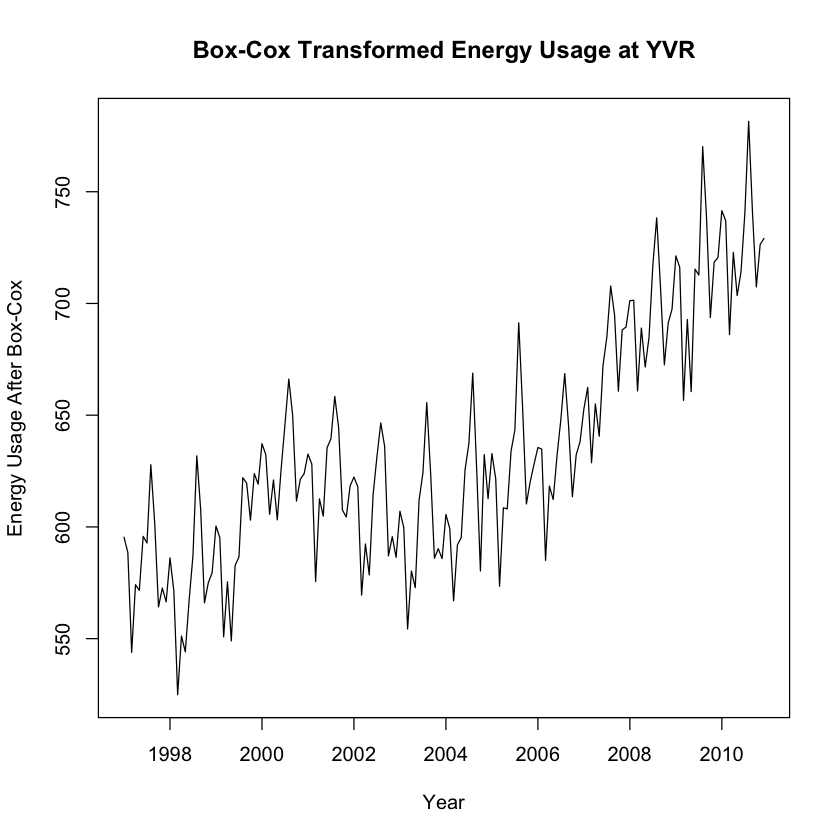

In [8]:
library(forecast)

# Box-Cox Transformation
lambda <- BoxCox.lambda(energy_ts)
energy_ts_transformed <- BoxCox(energy_ts, lambda)

# Plot the transformed data
plot(energy_ts_transformed, xlab = "Year", ylab = "Energy Usage After Box-Cox", main = "Box-Cox Transformed Energy Usage at YVR")

The use of the box-cox transformation is to stabalise the variance within the data, and shape the data for ease of modelling. The optimal lambda was chosen to best adjust the data. Comparing the transformed and original plots, the fluctuations in electricity use appear more consistent after transformation. This suggests the transformation was effective in reducing variance.


### Calendar adjustment for number of days in each month (1 mark)
Write the code to do a calendar adjustment based on number of days in each month for the electricity use data - use the original data, not the transformed data (this code will be submitted as part of the last question for Part A of the project).

Create a time plot of the calendar adjusted data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using this calendar adjustment and if it was effective for this dataset (5 sentences max).

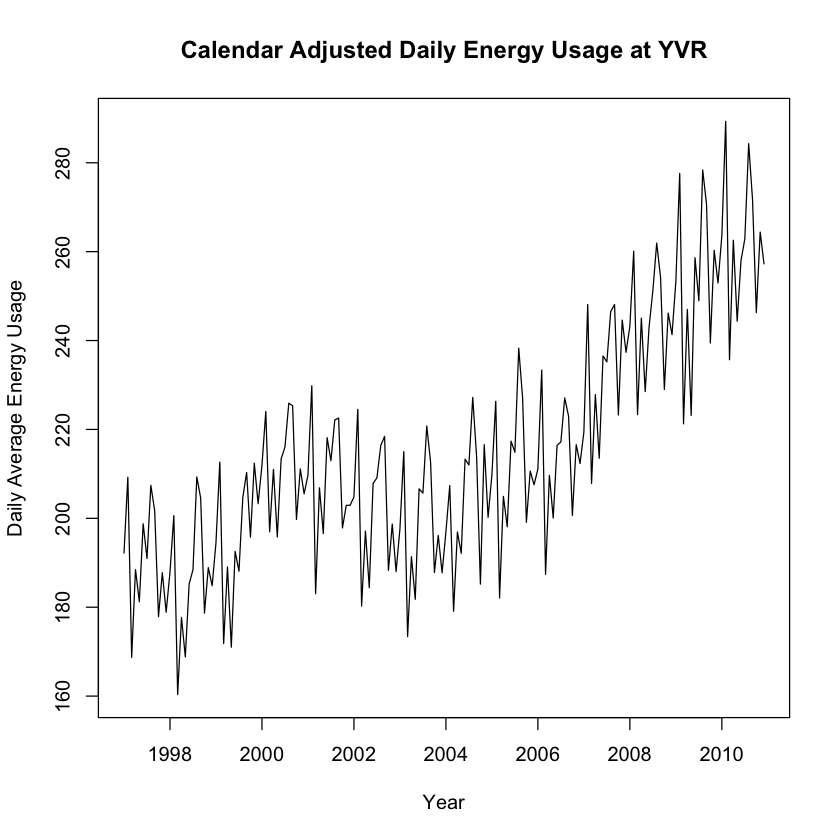

In [10]:
# Calendar adjustment
dframe <- cbind(DailyAverage = energy_ts/monthdays(energy_ts))

# Plot
plot(dframe, xlab = "Year", ylab = "Daily Average Energy Usage", main = "Calendar Adjusted Daily Energy Usage at YVR")

The purpose of the calendar adjustment is to remove the variation in seasonal data that is due to simple calendar effects. The daily average accounts for varying days in each month, making electricity use data comparable over time. Without this adjustment, shorter months like February may show lower usage simply due to fewer days. The adjusted plot appears smoother while preserving trends and seasonal patterns. This suggests the adjustment was effective in reducing distortions caused by month length, which makes the data more suitable for forecasting and analysis.

Is there a different calendar-related adjustment that you think would be more effective? Describe it and why you think it could be more effective (5 sentences max). Note: you do not have to write code or perform this adjustment. (0.5 marks)

Another adjustment is to normalise by weekdays or peak travel days to better reflect demand variations. This method accounts for holidays, weekends, and seasonal flight patterns. It may capture trends better than a simple month-length adjustment. However, its effectiveness depends on how YVR's energy use is distributed.

### Divide the data into the training set and the test set (0.25 marks)
Write the code to create the training set and the test set. Show the code as your answer on Canvas.

In [12]:
# Calculate the total number of observations
total_obs <- length(energy_ts)

# Define the split index (80% train, 20% test)
train_size <- round(0.8 * total_obs)  # 80% of data
test_start_index <- train_size + 1    # Start test set right after train set

# Get the corresponding year and month for the split point
train_end_year <- 1997 + (train_size - 1) %/% 12  # Year calculation
train_end_month <- (train_size - 1) %% 12 + 1     # Month calculation

# Create training and test sets
train_ts <- window(energy_ts, end = c(train_end_year, train_end_month))
test_ts <- window(energy_ts, start = c(train_end_year, train_end_month + 1))

# Verify split
print(start(train_ts)); print(end(train_ts))
print(length(train_ts))
print(start(test_ts)); print(end(test_ts))
print(length(test_ts))

[1] 1997    1
[1] 2008    2
[1] 134
[1] 2008    3
[1] 2010   12
[1] 34


Upload your code to Canvas for Part A (0.25 marks)

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

### 1. Seasonality:

The **seasonal plot** and **STL decomposition** show a strong **yearly pattern** in electricity use at YVR. Consumption peaks in July and August, likely due to higher passenger volume and air conditioning needs. The lowest usage appears in March and October, possibly linked to lower travel demand or reduced heating/cooling requirements. The pattern remains consistent across years, confirming a stable seasonal cycle.

### 2. Trend/Cycle:

The electricity usage at YVR shows a **steady upward trend** from 1997 to 2010, as seen in both the **STL decomposition** and **moving average analysis**. The increase suggests growing airport operations and rising passenger volume, leading to higher energy consumption. The **ACF plot** indicates a **slow decay** in autocorrelation, reinforcing the presence of a persistent trend. 

### 3. Unusual Features:

There is no significant unusual features. The **ACF plot** reveals **strong seasonal autocorrelation**, confirming that electricity use follows a repeating cycle. The residuals suggest some irregular variation, possibly due to unexpected demand shifts, energy-saving measures, or external factors affecting airport operations.

### Time Plot

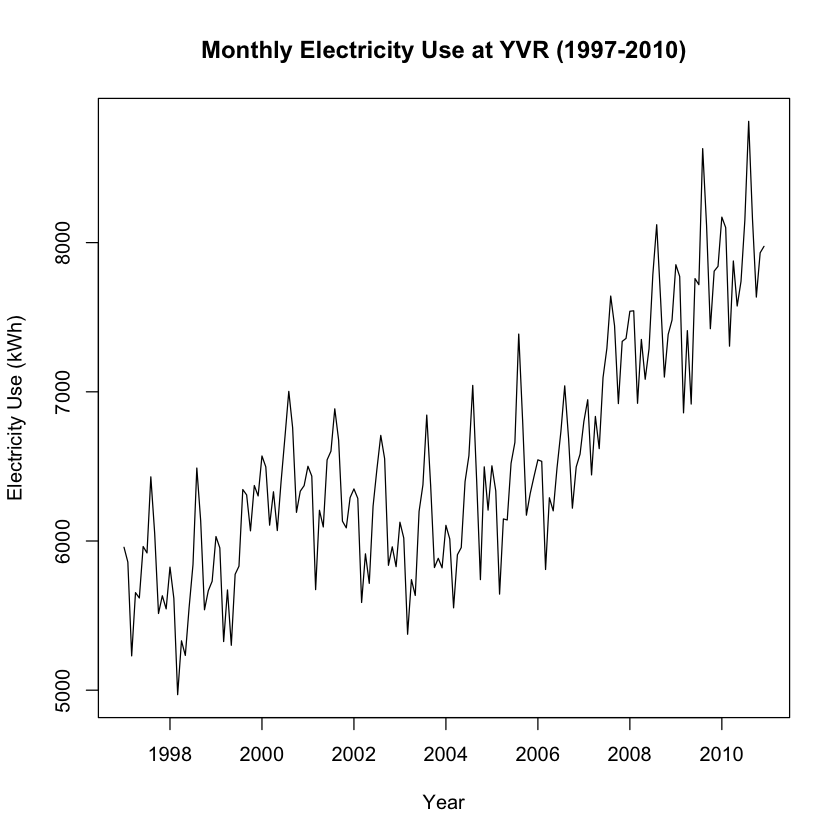

In [48]:
plot(energy_ts, main = "Monthly Electricity Use at YVR (1997-2010)", ylab = "Electricity Use (kWh)", xlab = "Year")

### ACF Plot

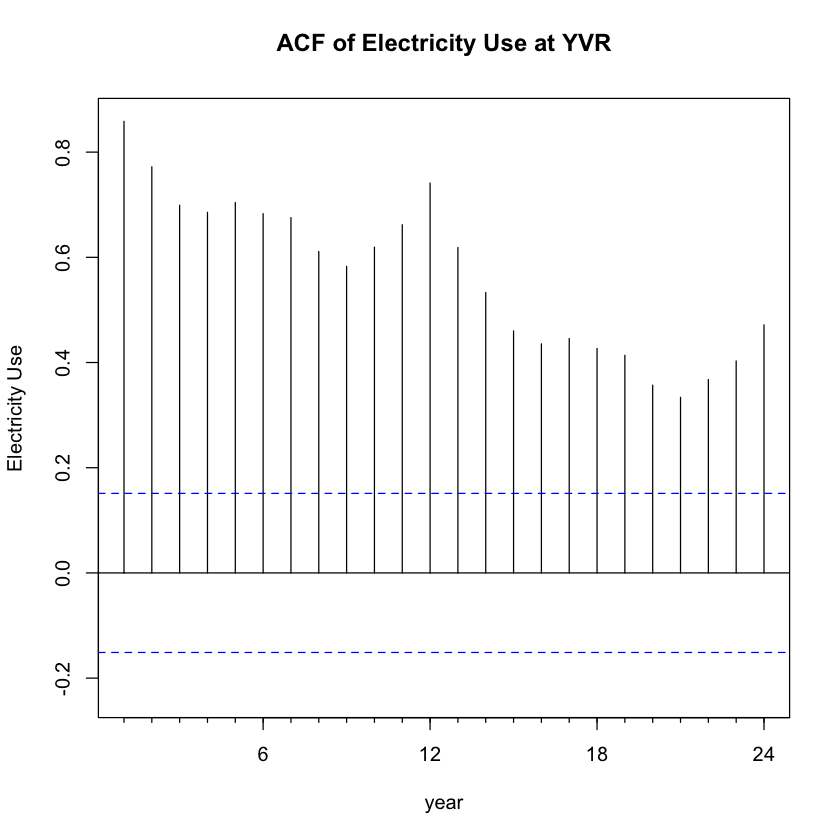

In [51]:
Acf(energy_ts, main = "ACF of Electricity Use at YVR", ylab = 'Electricity Use', xlab = 'year')

### STL Decomposition (Trend + Seasonality)

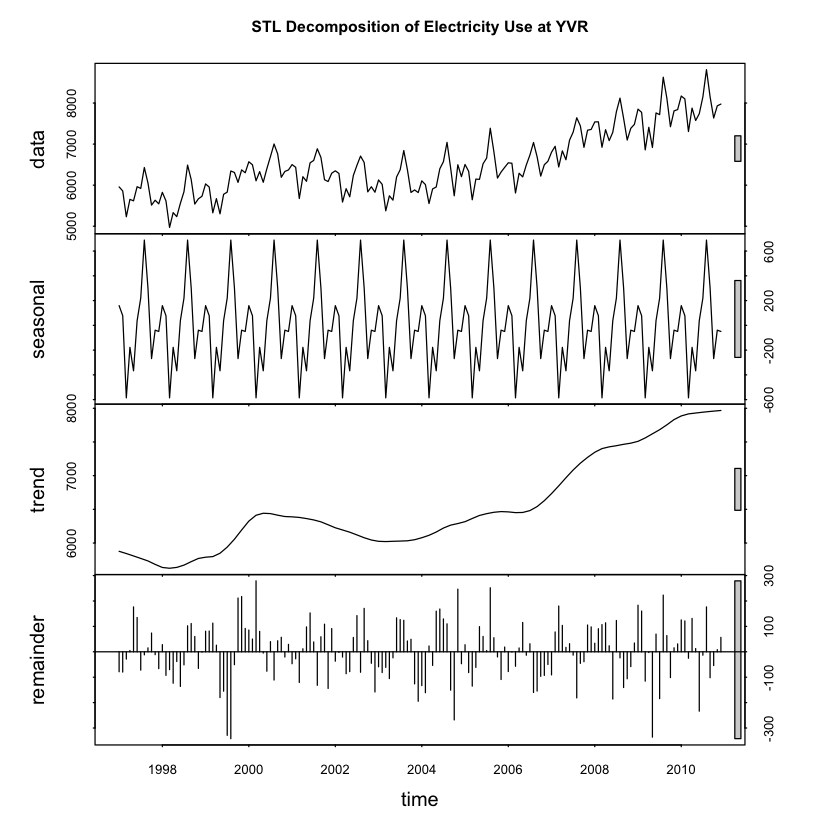

In [54]:
stl_decomp <- stl(energy_ts, s.window = "periodic")
plot(stl_decomp, main = "STL Decomposition of Electricity Use at YVR")

 ### Seasonality Plot

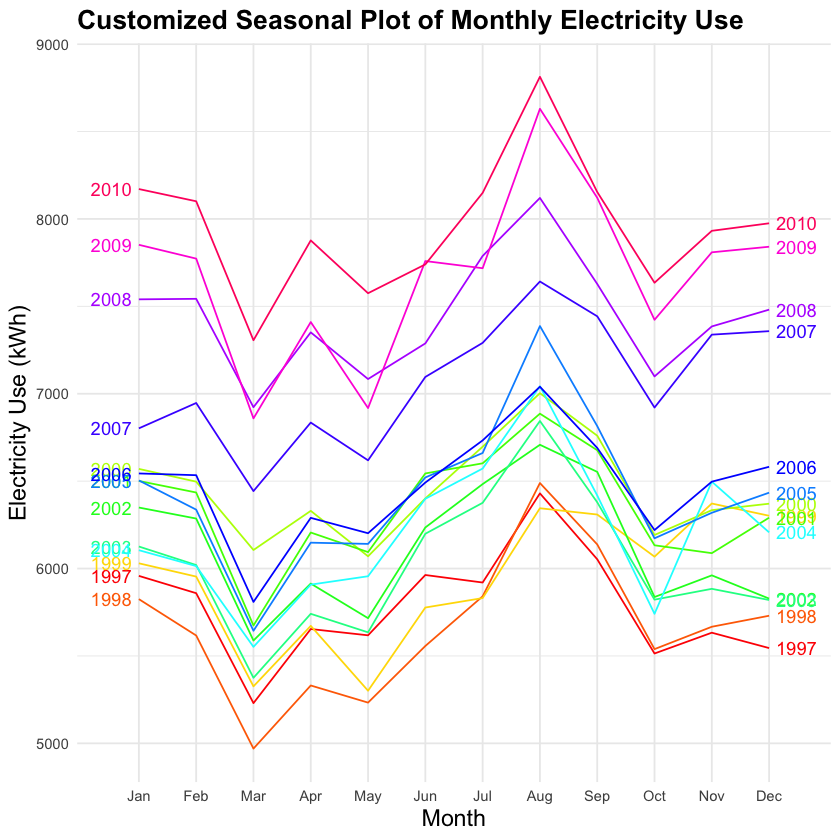

In [57]:
library(ggplot2)
ggseasonplot(energy_ts, year.labels = TRUE, year.labels.left = TRUE, 
             col = rainbow(14), 
             pch = 16, lwd = 1.5,
             main = "Customized Seasonal Plot of Monthly Electricity Use",
             xlab = "Month", ylab = "Electricity Use (kWh)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"), 
        axis.title = element_text(size = 14))

### Moving Average Trend Analysis (12-month MA)

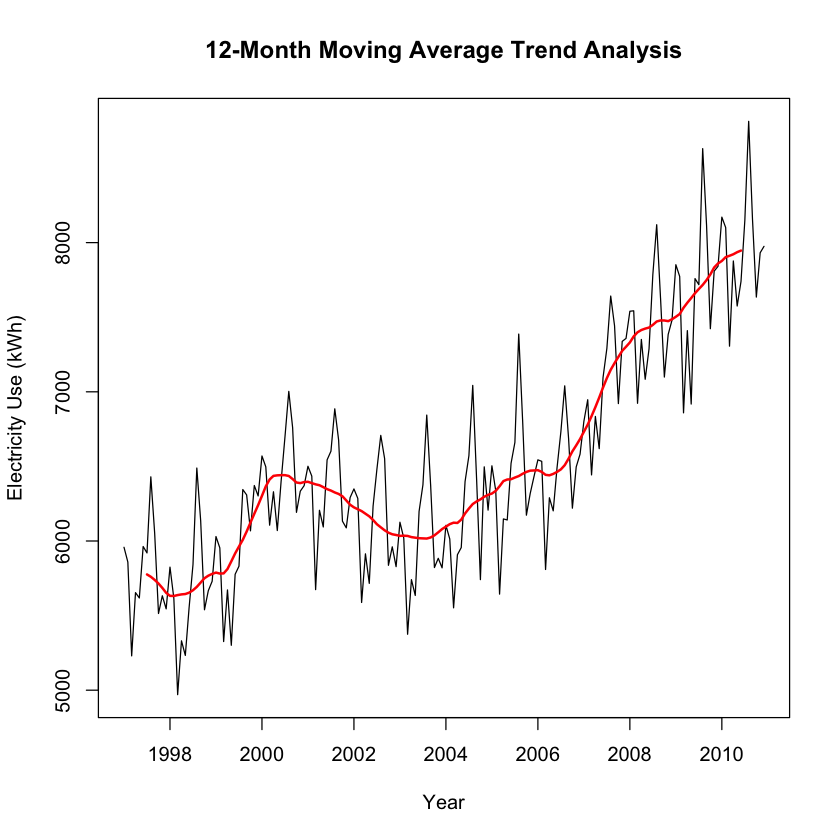

In [60]:
energy_ma <- ma(energy_ts, order = 12) 
plot(energy_ts, main = "12-Month Moving Average Trend Analysis", ylab = "Electricity Use (kWh)", xlab = "Year")
lines(energy_ma, col = "red", lwd = 2)  # Add moving average in red

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

### **Potential Causes of Electricity Use Patterns**  

#### **1. Seasonal Temperature Effects**  
The scatter plot of **electricity use vs. mean temperature** shows a slight **positive relationship** (correlation = 0.175). Electricity usage increases as temperature rises, likely due to **higher cooling demand** in summer months. However, the correlation is relatively weak, suggesting that temperature alone does not fully explain the seasonal variations.

#### **2. Passenger Volume Impact**  
The **electricity use vs. total passengers** scatter plot shows a **positive correlation(0.449)**, indicating that **higher passenger traffic leads to greater energy consumption**. This is expected, as more passengers result in increased **terminal activity, lighting, air conditioning, and operational demand** at the airport. The linear trend suggests a consistent relationship between passenger numbers and energy use.

#### **3. Combined Influence of Factors**  
The **correlation matrix** shows that **passenger numbers and temperature are also highly correlated (0.755)**, meaning that peak travel months coincide with warmer temperatures. This makes it difficult to isolate the effect of each variable independently. The increasing trend in electricity use over time aligns with **airport expansions and growing air traffic**.

#### **4. No Major External Disruptions**  
The scatter plots do not show **significant outliers or sudden shifts**, suggesting that electricity use primarily follows expected seasonal and operational patterns. Any minor deviations in electricity use may be due to **energy-saving measures, flight schedule changes, or temporary maintenance events**.

#### **Conclusion**  
Electricity consumption at YVR is driven by **passenger volume and seasonal temperature changes**, with **passenger traffic having a stronger influence**. These patterns support the idea that future energy forecasting should consider **both travel trends and climate variations**.

### Correlation Matrix to Check Relationships

In [64]:
cor_matrix <- cor(energy_use[, c("energy", "mean.temp", "total.passengers")])
print(cor_matrix)

                    energy mean.temp total.passengers
energy           1.0000000 0.1752943        0.4489983
mean.temp        0.1752943 1.0000000        0.7550946
total.passengers 0.4489983 0.7550946        1.0000000


### Scatter Plot: Electricity Use vs. Mean Temperature

`geom_smooth()` using formula = 'y ~ x'


null device 
          1

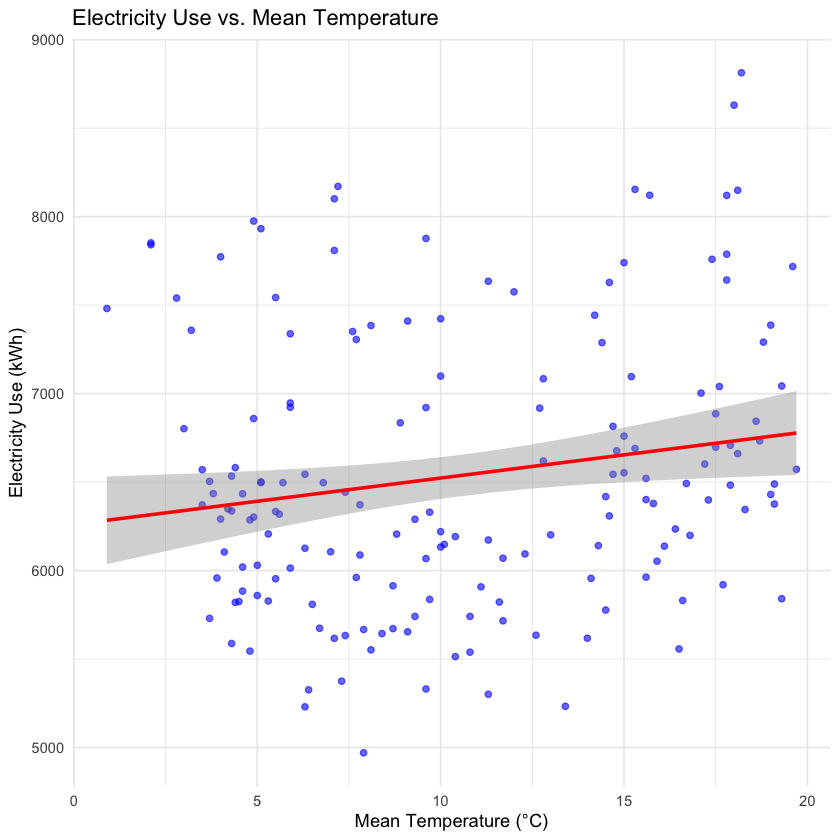

In [67]:
ggplot(energy_use, aes(x = mean.temp, y = energy)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Electricity Use vs. Mean Temperature") +
  xlab("Mean Temperature (°C)") +
  ylab("Electricity Use (kWh)") +
  theme_minimal()
dev.off()

### Scatter Plot: Electricity Use vs. Passenger Count

`geom_smooth()` using formula = 'y ~ x'


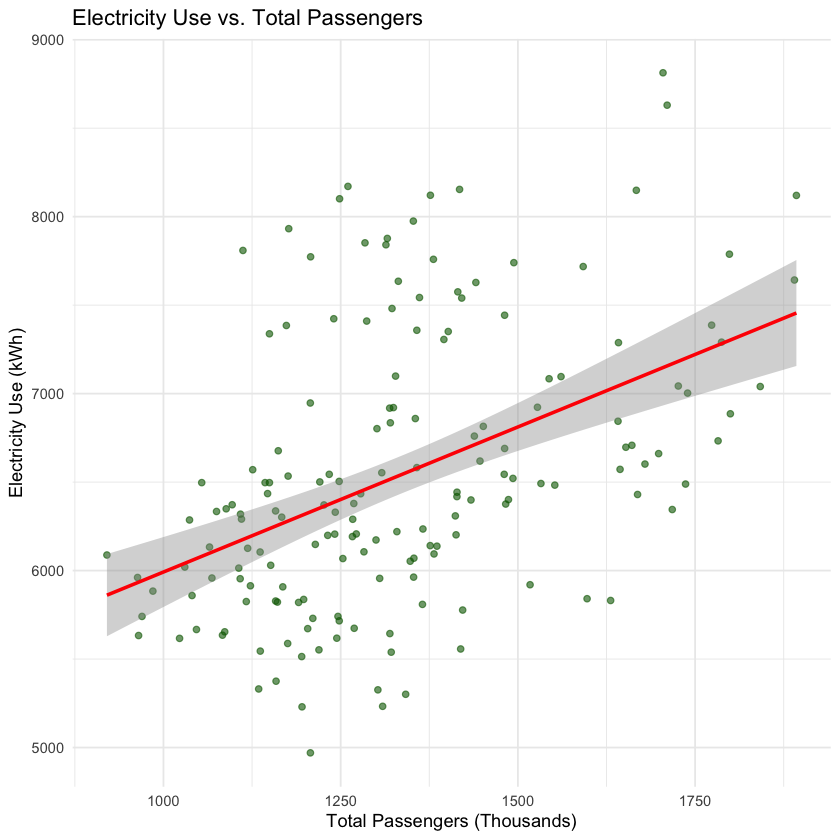

In [70]:
ggplot(energy_use, aes(x = total.passengers, y = energy)) +
  geom_point(color = "darkgreen", alpha = 0.6) +
  geom_smooth(method = "lm", col = "red") +
  ggtitle("Electricity Use vs. Total Passengers") +
  xlab("Total Passengers (Thousands)") +
  ylab("Electricity Use (kWh)") +
  theme_minimal()

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

#### Visual Assessment
By looking at the plot, the drift method (green line) appears to produce the best forecasts for the test set as it closely follows the upward trend of electricity usage. The naive method (red line) remains constant and does not capture the increasing trend, leading to significant underestimation. The seasonal naive method (purple) captures some seasonal variation but exhibits higher deviations from the actual test data. The mean method (blue) performs poorly as it predicts a flat trend, significantly underestimating the observed values.

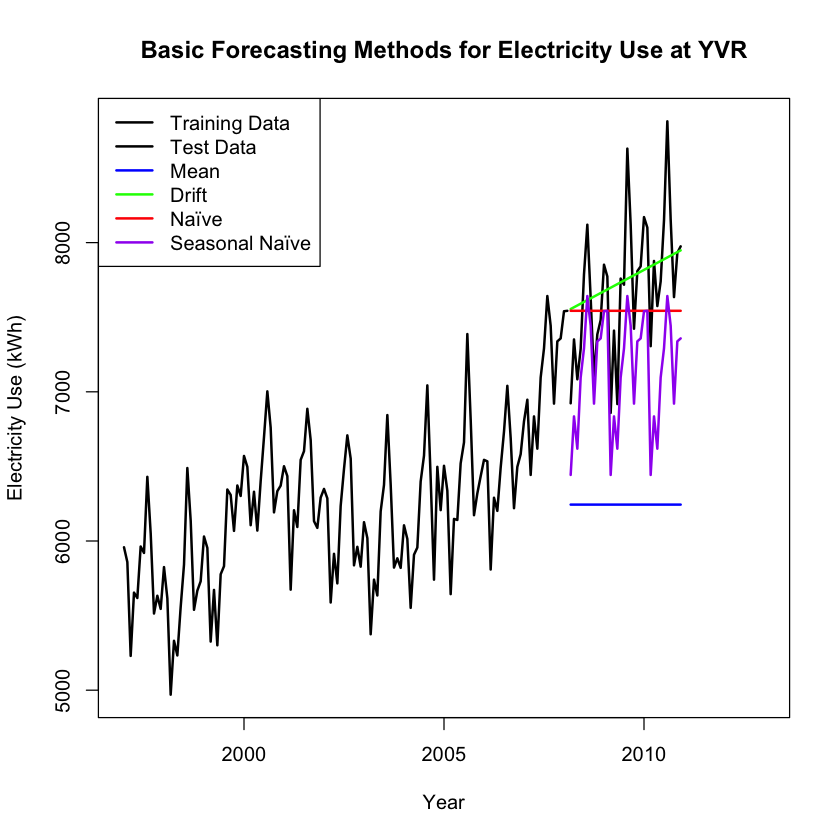

In [72]:
# Mean method (blue)
mean_fcst <- meanf(train_ts, h = length(test_ts))

# Drift method (green)
drift_fcst <- rwf(train_ts, h = length(test_ts), drift = TRUE)

# Naive method (red)
naive_fcst <- naive(train_ts, h = length(test_ts))

# Seasonal naïve method (purple)
snaive_fcst <- snaive(train_ts, h = length(test_ts))

#Plot the Forecasts with Training and Test Data
plot(train_ts, xlim = c(1997, 2013), ylim = range(energy_ts), col = "black", lwd = 2, 
     main = "Basic Forecasting Methods for Electricity Use at YVR",
     ylab = "Electricity Use (kWh)", xlab = "Year")

lines(test_ts, col = "black", lwd = 2)  # Test set in black
lines(mean_fcst$mean, col = "blue", lwd = 2)  # Mean method
lines(drift_fcst$mean, col = "green", lwd = 2)  # Drift method
lines(naive_fcst$mean, col = "red", lwd = 2)  # Naive method
lines(snaive_fcst$mean, col = "purple", lwd = 2)  # Seasonal naïve method

legend("topleft", legend = c("Training Data", "Test Data", "Mean", "Drift", "Naïve", "Seasonal Naïve"),
       col = c("black", "black", "blue", "green", "red", "purple"), lwd = 2)

## Accuracy measures (0.5 marks)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [183]:
# Calculate accuracy metrics
accuracy_mean <- accuracy(mean_fcst, test_ts)["Test set", c("RMSE", "MAE", "MAPE", "MASE")]
accuracy_naive <- accuracy(naive_fcst, test_ts)["Test set", c("RMSE", "MAE", "MAPE", "MASE")]
accuracy_snaive <- accuracy(snaive_fcst, test_ts)["Test set", c("RMSE", "MAE", "MAPE", "MASE")]
accuracy_drift <- accuracy(drift_fcst, test_ts)["Test set", c("RMSE", "MAE", "MAPE", "MASE")]

# Combine into a single table
accuracy_table <- rbind(
  `Mean Method` = accuracy_mean,
  `Naive Method` = accuracy_naive,
  `Seasonal Naive Method` = accuracy_snaive,
  `Drift Method` = accuracy_drift
)

# Round values for better readability
accuracy_table <- round(accuracy_table, 1)

# Print table
print(accuracy_table)

                        RMSE    MAE MAPE MASE
Mean Method           1521.2 1452.8 18.6  5.3
Naive Method           476.7  388.4  5.0  1.4
Seasonal Naive Method  607.3  546.0  7.0  2.0
Drift Method           405.6  310.7  4.1  1.1


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

The **drift method** has the best forecast, as it has the **lowest RMSE (405.6), MAE (310.7), MAPE (4.1%), and MASE (1.1)**. This suggests that the drift method captures both the **upward trend and overall variation** in electricity use better than the other basic methods. The **MASE value of 1.1** indicates that the drift method’s errors are **only slightly worse than a simple naïve forecast**, making it a relatively effective choice. Given the test set performance, the drift method is a **reasonable baseline for forecasting** before exploring more advanced models.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

The model chosen is an ETS (M,A,A)

In [79]:
ets_maa <- ets(train_ts, model = "MAA")
summary(ets_maa)

ETS(M,A,A) 

Call:
ets(y = train_ts, model = "MAA")

  Smoothing parameters:
    alpha = 0.8213 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5823.3198 
    b = 9.913 
    s = -73.4558 -49.4983 -242.8991 322.1338 654.1154 230.1296
           67.4168 -344.9892 -193.0333 -566.1402 56.6949 139.5256

  sigma:  0.0212

     AIC     AICc      BIC 
1981.527 1986.803 2030.790 

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 2.963662 123.0535 94.18045 0.009913109 1.506994 0.3467951
                   ACF1
Training set -0.0232227

## What are the estimates of the smoothing parameters? (0.25 marks)

In [81]:
# Extract smoothing parameters
alpha <- ets_maa$par["alpha"]
gamma <- ets_maa$par["gamma"]

# Print the smoothing parameters
cat("Alpha (α):", round(alpha, 4), "\n")
cat("Gamma (γ):", round(gamma, 4), "\n")

Alpha (α): 0.8213 
Gamma (γ): 1e-04 


## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

The **ETS(M,A,A) model** is the best fit for forecasting electricity use at YVR because it captures both **the upward trend and strong seasonality** observed in the data. The **multiplicative trend** accounts for proportional growth in electricity use, while the **additive seasonality** effectively models stable seasonal fluctuations. A **high smoothing factor (α = 0.8213)** ensures responsiveness to recent data, and the model achieves **the lowest RMSE (123.05) and MAPE (1.51%)**, confirming strong forecast accuracy. Additionally, **residual diagnostics show no significant autocorrelation**, validating the model’s reliability for forecasting.

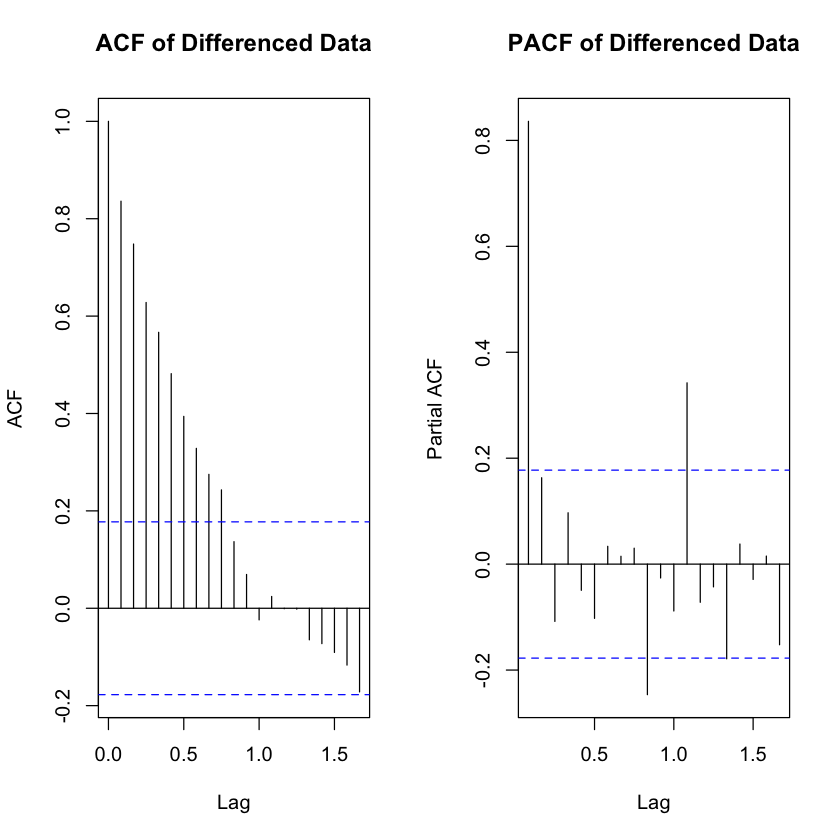

In [84]:
# Difference the time series
diff_data <- diff(train_ts, lag = 12)

# Plot ACF & PACF
par(mfrow = c(1, 2))  # Plot side by side
acf(diff_data, main = "ACF of Differenced Data")
pacf(diff_data, main = "PACF of Differenced Data")

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

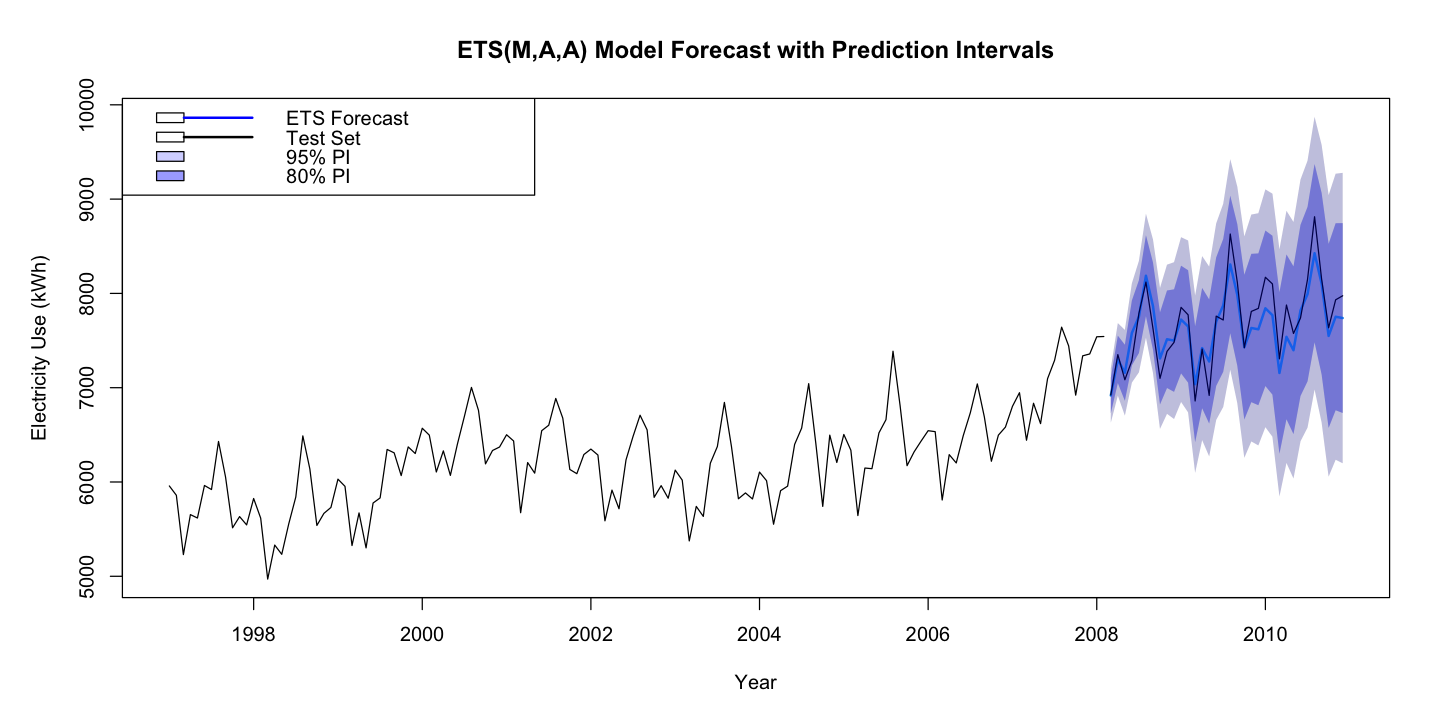

In [86]:
par(mar = c(5, 5, 4, 2) + 0.1)  
options(repr.plot.width = 12, repr.plot.height = 6)  

# Generate ETS(M,A,A) forecasts
ets_forecast <- forecast(ets_maa, h = length(test_ts))

# Plot the base time series with forecasts
plot(ets_forecast, main = "ETS(M,A,A) Model Forecast with Prediction Intervals",
     ylab = "Electricity Use (kWh)", xlab = "Year", col = "black")

# Test set in black
lines(test_ts, col = "black")  

# Extract time values for the test set
time_values <- time(test_ts)  

# Draw 95% and 80% prediction intervals
polygon(c(time_values, rev(time_values)), 
        c(ets_forecast$lower[, 2], rev(ets_forecast$upper[, 2])),
        col = rgb(0, 0, 1, 0.1), border = NA)  # 95% Prediction Interval (Darker Blue)

polygon(c(time_values, rev(time_values)), 
        c(ets_forecast$lower[, 1], rev(ets_forecast$upper[, 1])),
        col = rgb(0, 0, 1, 0.2), border = NA)  # 80% Prediction Interval (Lighter Blue)

legend("topleft", legend = c("ETS Forecast", "Test Set", "95% PI", "80% PI"),
       col = c("blue", "black", rgb(0, 0, 1, 0.2), rgb(0, 0, 1, 0.4)),
       lty = c(1, 1, NA, NA), lwd = c(2, 2, NA, NA),
       fill = c(NA, NA, rgb(0, 0, 1, 0.2), rgb(0, 0, 1, 0.4)))


## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

The ETS(M,A,A) model provides **the most accurate in-sample fit**, achieving the **lowest RMSE (123.05) and MAPE (1.51%)**, outperforming other tested ETS models. Although ETS(A,N,A) has a slightly lower AIC (1980.613 vs. 1981.527), its **forecast accuracy is slightly worse (RMSE = 125.15, MAPE = 1.55%)**, making ETS(M,A,A) the better choice. ETS(A,A,N), with a significantly higher AIC (2243.386) and RMSE (359.46), overfits the data and does not generalize well.

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [88]:
# Calculate accuracy measures for the test set
accuracy_measures <- accuracy(ets_forecast, test_ts)

# Extract and display the relevant metrics
test_set_metrics <- data.frame(
  RMSE = round(accuracy_measures["Test set", "RMSE"], 2),
  MAE = round(accuracy_measures["Test set", "MAE"], 2),
  MAPE = paste0(round(accuracy_measures["Test set", "MAPE"], 2), "%"),
  MASE = round(accuracy_measures["Test set", "MASE"], 2)
)

# Display the results
print(test_set_metrics)

    RMSE    MAE  MAPE MASE
1 195.98 161.74 2.08%  0.6


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

The ETS(M,A,A) model provides **highly accurate forecasts**, achieving an RMSE of **195.98** and a MAPE of **2.08%**, which is significantly better than the basic forecasting methods. Compared to the **seasonal naïve method (RMSE = 607.3, MAPE = 7.0%)** and **drift method (RMSE = 405.6, MAPE = 4.1%)**, ETS(M,A,A) demonstrates superior predictive performance. The **MASE of 0.6** confirms that this model performs **much better than a naive forecast**, effectively capturing both trend and seasonality. Given these results, **ETS(M,A,A) is the most reliable model for forecasting electricity use at YVR**.


## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

### Calculate the Mean of the Residuals

The mean of the residuals is **0.00049**, which is **very close to zero**. This indicates that the model's forecasts are **unbiased on average** and do not systematically overpredict or underpredict electricity usage. Since model bias would be reflected in a large positive or negative mean residual, this result confirms that **ETS(M,A,A) does not exhibit significant bias**.

In [92]:
residuals_maa <- residuals(ets_maa)

mean_residuals <- mean(residuals_maa, na.rm = TRUE)
print(mean_residuals)

[1] 0.0004884997


### Check Residual Properties

The residuals meet key assumptions, no strong autocorrelation and stable variance. However, minor deviations from normality exist due to some outliers. Overall, the model's residuals are well-behaved, supporting its validity for forecasting.


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 15.124, df = 24, p-value = 0.9171

Model df: 0.   Total lags used: 24



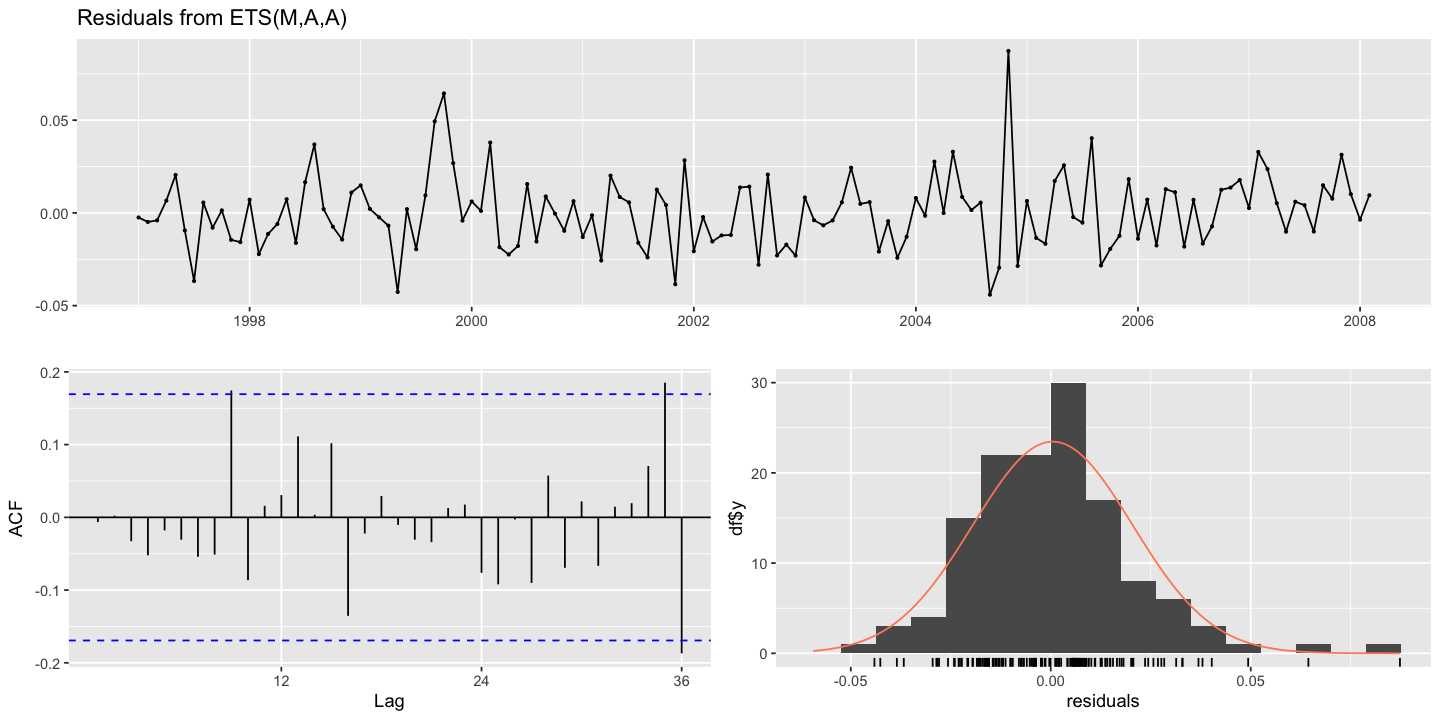

In [94]:
checkresiduals(ets_maa)

### Portmanteau test for autocorrelations

#### **Hypotheses**  
- **Null Hypothesis (H₀):** The residuals **are not autocorrelated** (i.e., they resemble white noise).  
- **Alternative Hypothesis (H₁):** The residuals **are autocorrelated** (i.e., the model has not fully captured patterns in the data).  

#### **Using Lag 12**  
The **choice of 12 lags** is based on the need to check for short-term dependency while ensuring enough degrees of freedom. Since our dataset has strong seasonal patterns, the 12 lags are able to capture the full seasonal cycle.

#### **Test Results**  
- **Test Statistic (X²):** 7.2248
- **p-value:** 0.8424  

#### **Decision & Conclusion**  
Since the **p-value (0.8424) is greater than 0.05**, we **fail to reject the null hypothesis**. This means that **there is no significant autocorrelation in the residuals**, indicating that the ETS(M,A,A) model has effectively captured the patterns in the data. **The residuals behave like white noise, supporting the model’s validity for forecasting.**

In [242]:
# Perform Ljung-Box test (Portmanteau test)
lb_test <- Box.test(residuals_maa, lag = 12, type = "Ljung-Box")

# Print results
print(lb_test)


	Box-Ljung test

data:  residuals_maa
X-squared = 7.2248, df = 12, p-value = 0.8424



----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

The chosen model is an ARIMA (0,1,1)x(1,1,1)12.

In [105]:
arima_training_2 <- Arima(train_ts, order = c(0,1,1), seasonal = list(order = c(1,1,1), period = 12))
summary(arima_training_2)

Series: train_ts 
ARIMA(0,1,1)(1,1,1)[12] 

Coefficients:
          ma1    sar1     sma1
      -0.2178  0.1583  -1.0000
s.e.   0.0897  0.0981   0.1566

sigma^2 = 17223:  log likelihood = -773.02
AIC=1554.03   AICc=1554.38   BIC=1565.21

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 9.910831 123.1535 89.73239 0.1321079 1.42775 0.3304163
                     ACF1
Training set -0.008261583

## What are the estimates of the parameters? (0.25 marks)

The estimates of the parameters are retrieved using the summary code above. The below is the results of the code put into words:

Non-seasonal part:
MA1 (MA of the first difference) has coefficient = -0.2178 and standard error = 0.0897

Seasonal part:
SAR1 (seasonal AR of the first seasonal difference) has coefficient = 0.1583 and standard error = 0.0981
SMA1 (seasonal MA of the first seasonal difference) has coefficient = -1.0000 and standard error = 0.1566

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

This model is a good fit for the data as it shows significant autocorrelations at seasonal intervals as indicated by the ACF and PACF plots. The original time plot shows seasonal patterns at every 12 months, so the seasonal AR component (SAR(1)) and seasonal MA component (SMA(1)) at lag 12 capture the patterns that repeat every year. The ACF plot shows immediate lag effects through the significant spike at lag 1, and the non-seasonal MA component (MA(1)) helps in correcting the forecast errors by capturing the shock effects from the previous term.

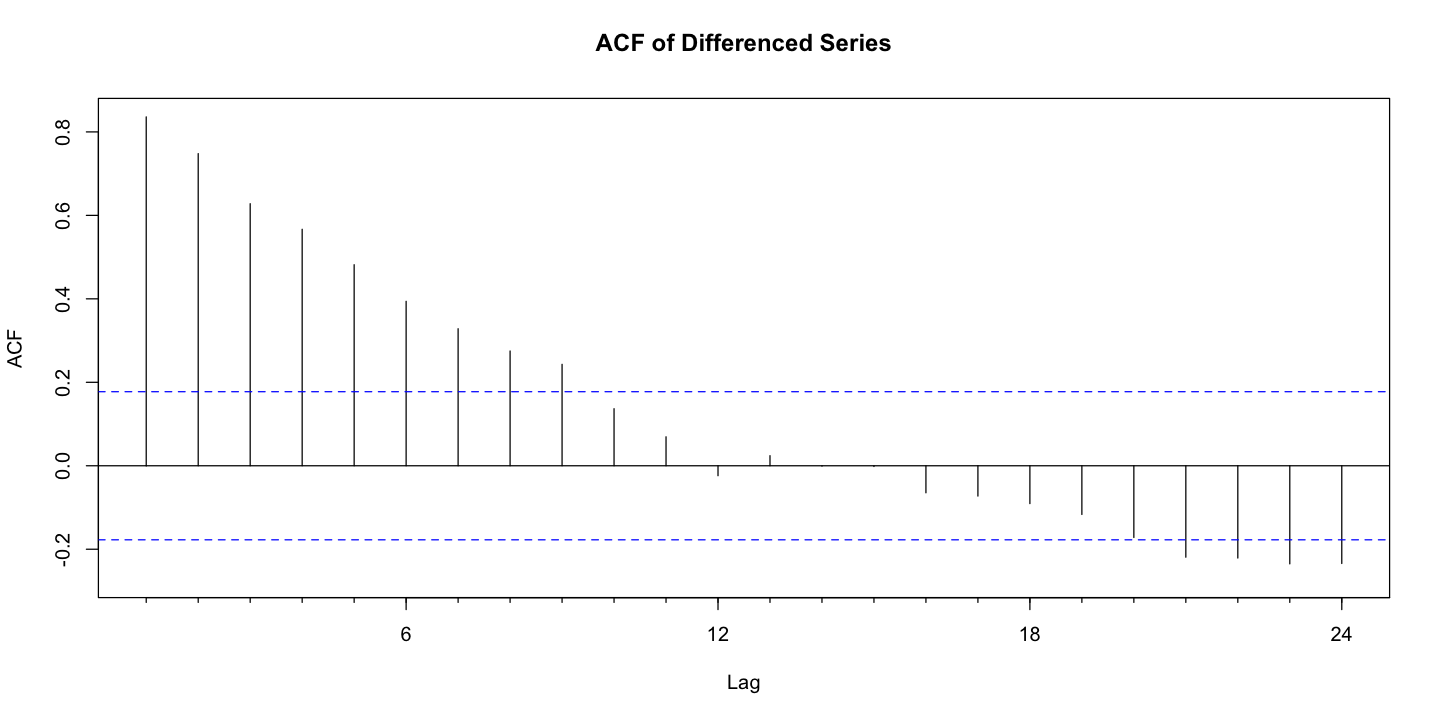

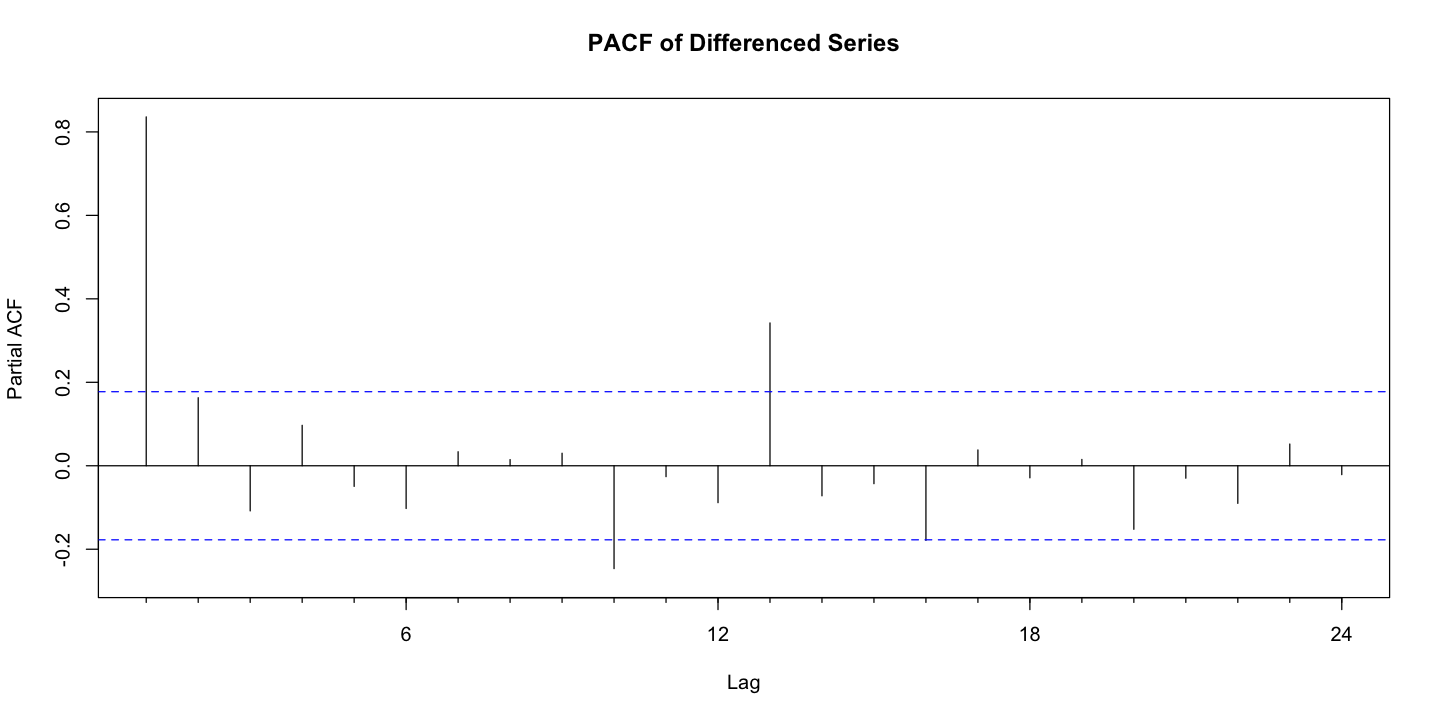

In [149]:
diff_train <- diff(train_ts, lag =12, differences =1)
# Plot ACF and PACF for the differenced data
Acf(diff_train, main="ACF of Differenced Series")
Pacf(diff_train, main="PACF of Differenced Series")

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

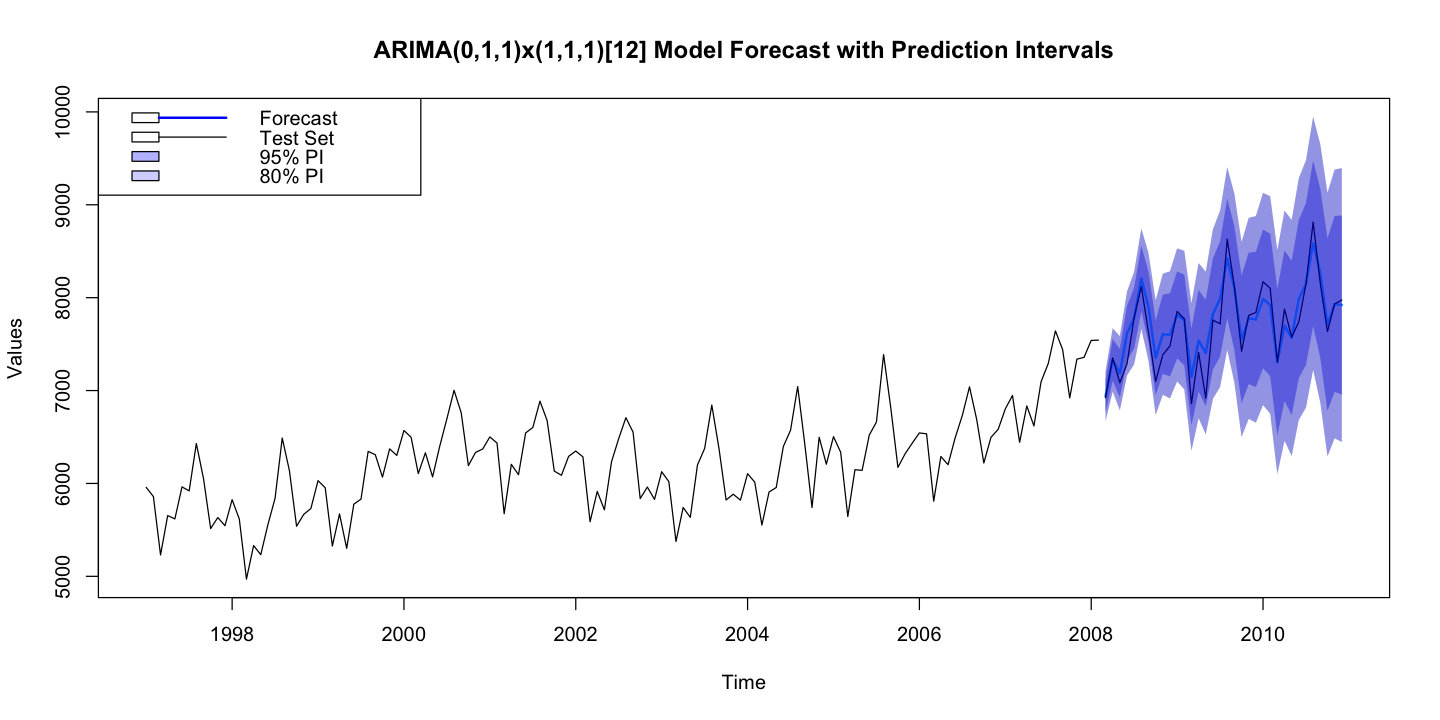

In [222]:
# Use the existing fitted model 'arima_training_2'
# Generate forecasts for the length of the test set
forecast_arima <- forecast(arima_training_2, h=length(test_ts))

# Plot the base time series with forecasts
plot(forecast_arima, main = "ARIMA(0,1,1)x(1,1,1)[12] Model Forecast with Prediction Intervals",
     xlab = "Time", ylab = "Values", col = "black")

# Plot test set in black
lines(test_ts, col = "black")

# Extract time values for the test set
time_values <- time(forecast_arima$mean)

# Draw 95% and 80% prediction intervals
polygon(c(time_values, rev(time_values)), 
        c(forecast_arima$lower[,2], rev(forecast_arima$upper[,2])), 
        col = rgb(0, 0, 1, 0.3), border = NA)  # 95% Prediction Interval (Darker Blue)
polygon(c(time_values, rev(time_values)), 
        c(forecast_arima$lower[,1], rev(forecast_arima$upper[,1])), 
        col = rgb(0, 0, 1, 0.2), border = NA)  # 80% Prediction Interval (Lighter Blue)

# Add legend
legend("topleft", legend = c("Forecast", "Test Set", "95% PI", "80% PI"),
       col = c("blue", "black", rgb(0, 0, 1, 0.3), rgb(0, 0, 1, 0.2)), 
       lty = c(1, 1, NA, NA), lwd = c(2, 1, NA, NA), 
       fill = c(NA, NA, rgb(0, 0, 1, 0.3), rgb(0, 0, 1, 0.2)))


## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

Our chosen model outperformed ARIMA(1,1,0)(0,1,1)12 in every error measure, and is has the lowest RMSE value of of 123.15, which is marginally better than the ARIMA(1,1,1)(1,1,1)12 model's RMSE of 123.16. Although our chosen model does not outperform the ARIMA(1,1,1)(1,1,1)12 in terms of MAE, MPE, MAPE and MASE, the slight disadvantage is negligible as the difference in values do not exceed 0.002 for every measure apart from the MAE (difference is 0.1). Despite this negligible underperformance in the error measures of our chosen model, its AIC (1554.03) and BIC (1565.21) are noticeably lower than the other two models, suggesting that it provides the best balance between model complexity and fit within the set. Therefore, this ARIMA (0,1,1)x(1,1,1)12 model is chosen for its comprehensive comparative advantages. 

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [136]:
forecast_arima <- forecast(arima_training_2, h=length(test_ts))
accuracy(forecast_arima, test_ts)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.910831,123.1535,89.73239,0.1321079,1.42775,0.3304163,-0.008261583,NA
Test set,-56.969702,174.5236,130.25015,-0.8288734,1.71997,0.4796124,0.216862570,0.3691002


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

The ARIMA(0,1,1)x(1,1,1)12 model excels in forecasting, with an RMSE of 174.5236 and MAE of 130.2502, significantly outperforming all of the basic methods. With also the lowest MAPE of 1.7180 and MASE of 0.4796, it demonstrates superior proportional and scale-adjusted error performance, making it highly effective for complex seasonal patterns. These results confirm the ARIMA model as a robust choice for nuanced forecasting tasks where precise trend capture and error minimization are critical.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

#### a) Calculating mean of residuals

The mean of the residuals has a value of close to 10, indicating that there is bias in the ARIMA(0,1,1)x(1,1,1)12 model. A positive mean value like this indicates that the model tends to underestimate the true values of the time series.

In [138]:
# Calculate the mean of the residuals from the ARIMA model
mean_residuals <- mean(residuals(arima_training_2))
# Print the mean of the residuals
print(mean_residuals)

[1] 9.910831


#### b) Checking for properties

Properties met:
1. the p value of 0.5984 from the Ljung-Box test suggests that there is no significant autocorrelation in the residuals at different lags up to 24.
2. the model's residuals are random, as the residuals plot shows fluctuations around zero without any obvious patterns or systematic changes over time.
 
Properties not met:
1. the histogram suggests that the residuals are not perfectly normally distributed.
2. them 9.91 mean of the residuals suggests a systematic underestimation by the model, indicating a bias that has not been captured entirely.


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(1,1,1)[12]
Q* = 18.793, df = 21, p-value = 0.5984

Model df: 3.   Total lags used: 24



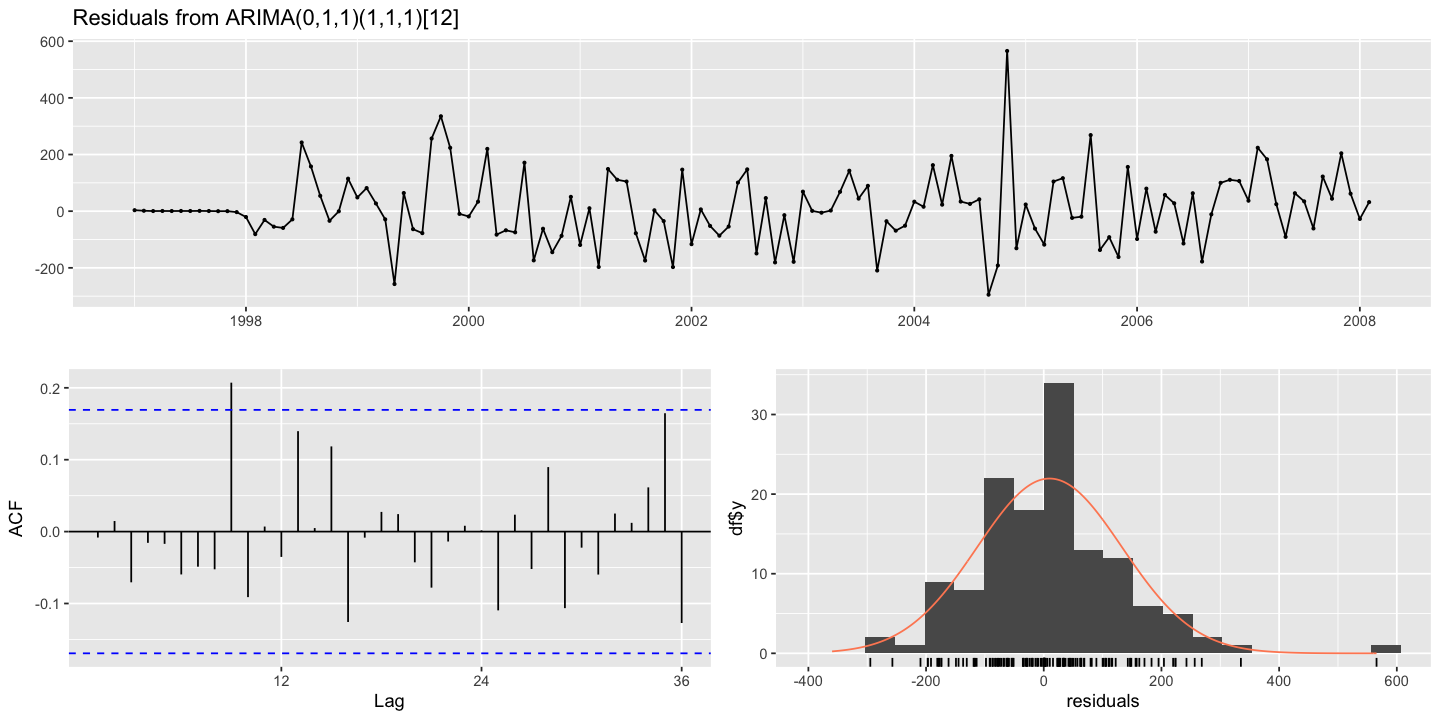

In [140]:
checkresiduals(arima_training_2)

#### c) Portmanteau test

Hypotheses:
Null Hypothesis (H0): There is no autocorrelation up to the 24-th lag (the residuals are independent).

Alternative Hypothesis (H1): There is some autocorrelation in the series at least up to the 24-th lag.

Number of lags tested:
24. This number is chosen because there is known seasonality that repeats every 12 months. 24 lags would be prudent to cover two seasonal cycles, which can provide a thorough check for any lingering seasonal autocorrelation that the model may not have captured.

Test Statistic: The value of 18.793 reflects the sum of squared standardized residuals over 24 lags.

P-value: The high p-value of 0.7629 indicates that there is no statistically significant evidence to reject the null hypothesis.

Decision: Since the p-value is greater than the typical alpha level of 0.05 (or even 0.10), we fail to reject the null hypothesis.

Conclusion: This suggests that the residuals from the chosen ARIMA model do not exhibit significant autocorrelation up to 24 lags, indicating that the model has effectively captured the underlying temporal dependencies in the data, including the seasonal effects noted in the dataset.

In [151]:
residuals <- residuals(arima_training_2)
# Perform the Box test 
box_test_result <- Box.test(residuals, type = "Ljung-Box", lag = 24)
# Print the results
print(box_test_result)


	Box-Ljung test

data:  residuals
X-squared = 18.793, df = 24, p-value = 0.7629



----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


Since both the ETS model and Arima model outperformed all basic models when their accuracy measures were compared, the optimal model would arise from either ETS(M,A,A) or ARIMA(0,1,1)x(1,1,1)12. 

Looking at the accuracy measures, the ARIMA model exhibits lower RMSE (174.52 VS 195.98) and MAE (130.25 VS 161.74) values compared to the ETS model, suggesting superior accuracy in minimising both squared and absolute errors. Visual inspection of the forecast plots shows the ARIMA model aligning more closely with actual data points, particularly where data variability is significant. However, ETS demonstrates a mean residual very close to zero (0.0004), indicating minimal bias, in contrast to the ARIMA model's higher mean residual (9.91).

Overall, despite the ARIMA model's bias indicated by the mean residual, it provides a better fit in terms of RMSE and MAE on the test set compared to the ETS model. Thus, the ARIMA model may be preferred for minimising forecasting errors in scenarios similar to predicting electricity usage at YVR, although the near-zero bias in the ETS model suggests it has merits in scenarios requiring unbiased forecats.


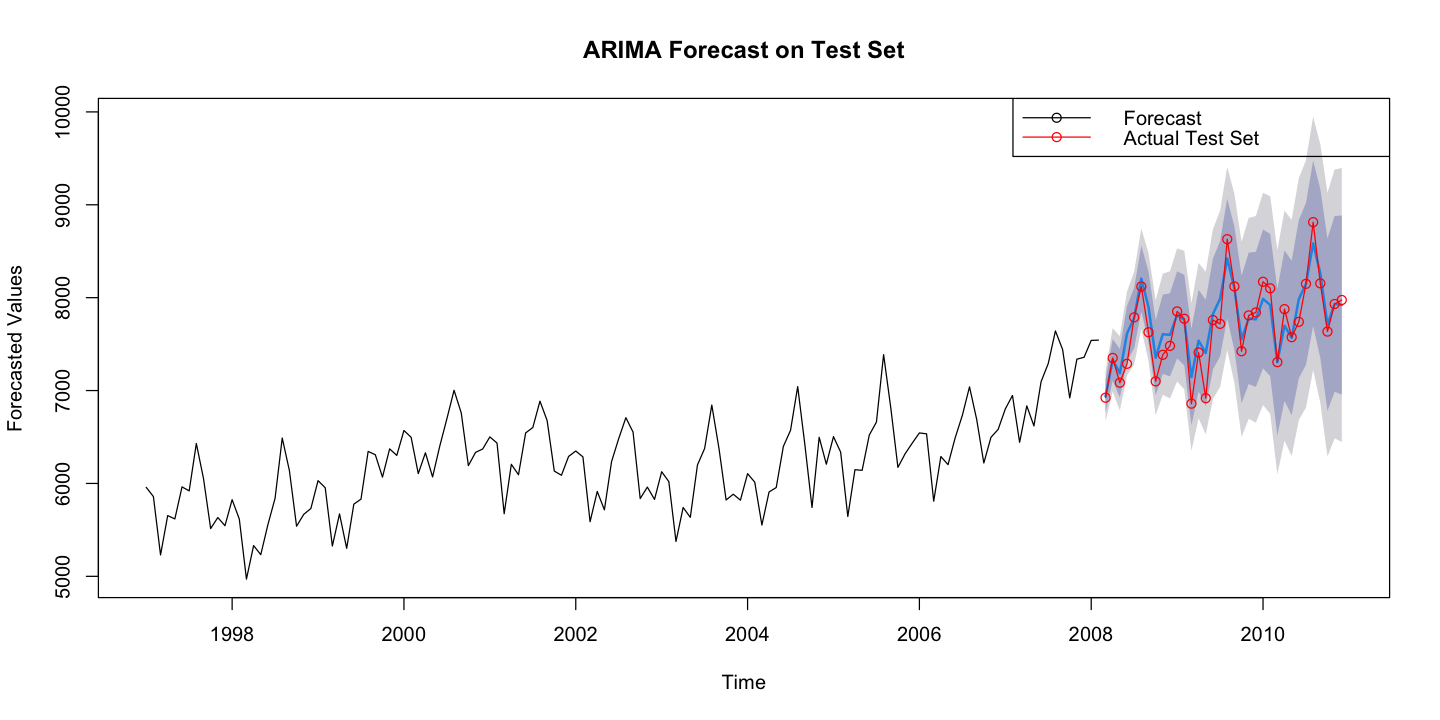

In [179]:
# Generate forecasts from the fitted ARIMA model for the length of the test set
arima_forecast <- forecast(arima_training_2, h=length(test_ts))
plot(arima_forecast, main="ARIMA Forecast on Test Set", xlab="Time", ylab="Forecasted Values")
lines(test_ts, col="red", type="o")  # Plot actual test set values for comparison

# Add a legend to differentiate between forecast and actual data
legend("topright", legend=c("Forecast", "Actual Test Set"), col=c("black", "red"), lty=1, pch=1)

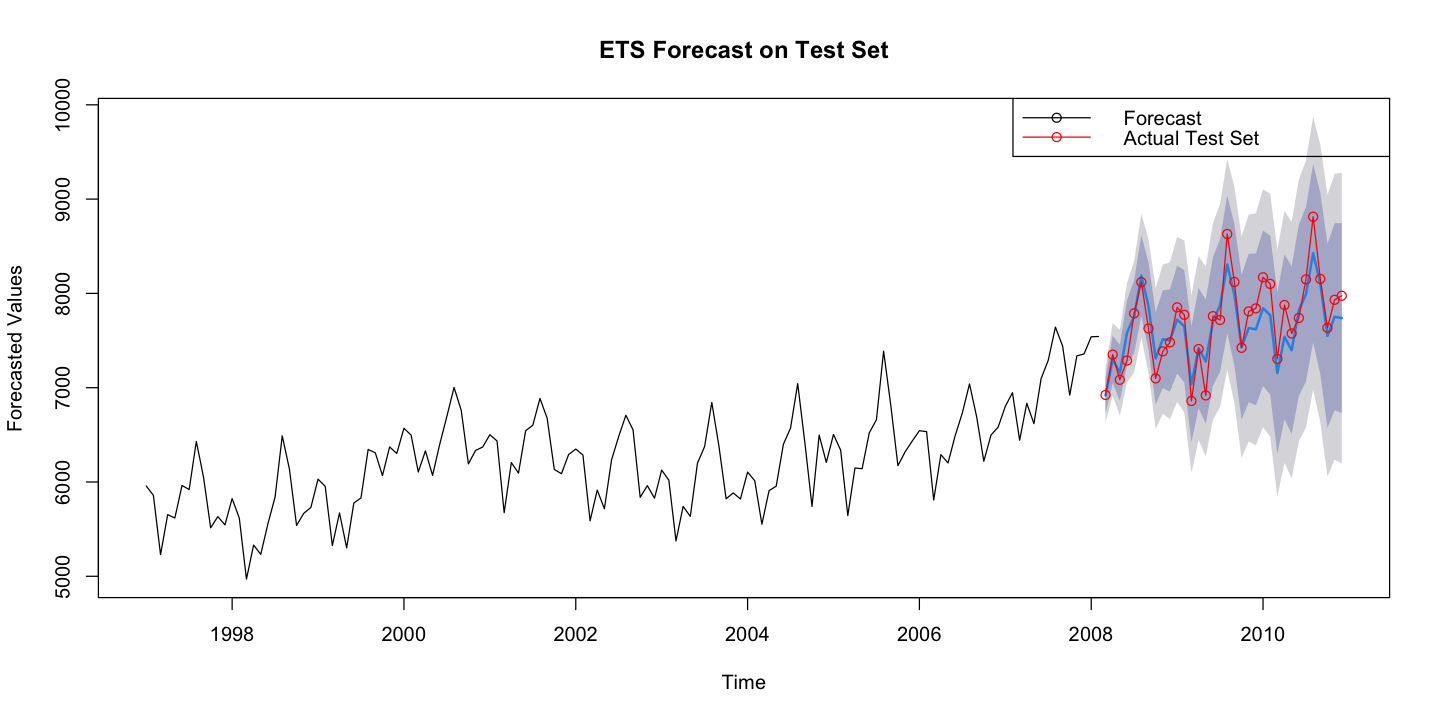

In [181]:
# Generate forecasts from the fitted ETS model for the length of the test set
ets_forecast <- forecast(ets_maa, h=length(test_ts))
plot(ets_forecast, main="ETS Forecast on Test Set", xlab="Time", ylab="Forecasted Values")
lines(test_ts, col="red", type="o")  # Plot actual test set values for comparison

# Add a legend to differentiate between forecast and actual data
legend("topright", legend=c("Forecast", "Actual Test Set"), col=c("black", "red"), lty=1, pch=1)

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

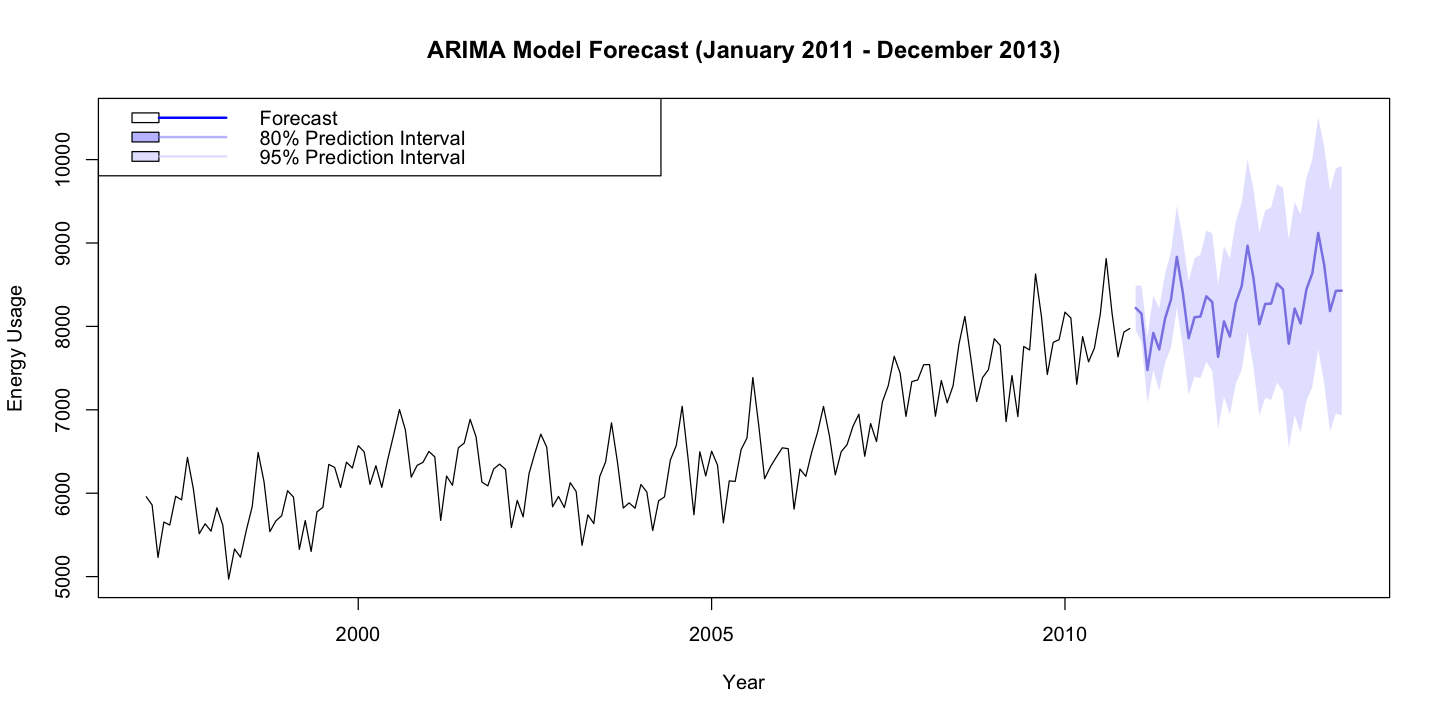

In [220]:
# Generate forecasts for the next 36 months
forecast_arima_36 <- forecast(Arima(energy_ts, model=arima_training_2), h=36) 

# Plot the forecast with intervals and add a title
plot(forecast_arima_36, main="ARIMA Model Forecast (January 2011 - December 2013)", xlab="Year", ylab="Energy Usage",
     shadecol=rgb(0.8, 0.8, 1, 0.5), fcol=rgb(0.1, 0.1, 0.8, 0.5))  

# Add a legend to the plot
legend("topleft", 
       legend=c("Forecast", "80% Prediction Interval", "95% Prediction Interval"), 
       col=c("blue", rgb(0.5, 0.5, 1, 0.5), rgb(0.8, 0.8, 1, 0.5)), 
       lty=c(1, 1, 1), 
       lwd=c(2, 2, 2), 
       fill=c(NA, rgb(0.5, 0.5, 1, 0.5), rgb(0.8, 0.8, 1, 0.5)))

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


#### **1. Residual and Model Bias:**
As mentioned before, the ARIMA model suffers from bias with a mean residual of 9.91, leading to underestimation. This bias could lead to consistent underprediction or overprediction in certain conditions, thereby affecting the accuracy of forecasts. After conducting `checkresiduals()`, it is found that the residuals are not normally distributed.

#### **Recommendation:**
To correct this normality issue, we can consider transformations like log or Box-Cox to stabilise variance and achieve a more normal distribution of residuals.

#### **2. Handling Complex Seasonal Variations:**
While the ARIMA model adopted includes seasonal differencing, it may still struggle with multiple seasonal patterns or changing seasonal effects over time, leading to suboptimal forecasts especially when the seasonality is strong and complex. For example, recurring events held in Vancouver or weather conditions could make the seasonality in this dataset more complex.

#### **Recommendation:**
Use models that are more suited to handle complex seasonal patterns, such as STL combined with exponential smoothing.

#### **3. Adaptability:**
Airports are dynamic environments where operational conditions can change rapidly due to new security measures, shifts in flight schedules, and changes in passenger behaviour. An ARIMA model, with fixed parameters, might not adapt quickly to such changes, affecting its long-term reliability.

#### **Recommendation:**
Adopt a rolling forecasting approach where the model is continuously updated as new data becomes available. As the parameters of an ARIMA model are fixed, constantly re-estimating the model parameters at regular intervals using the most recent data should improve model performance.formance.


----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
Include the ETS models that you tried and a brief description of why you ruled these out and selected your best ETS model to present above.
</div>

### **Selection of Three ETS Models for Comparison**  

To determine the best ETS model for forecasting electricity use at YVR, we selected three models that represent **different combinations of trend and seasonality components** while aligning with our previous exploratory data analysis (EDA).  

#### **ETS(A,N,A) – Additive Trend, No Trend Smoothing, Additive Seasonality**  
- Chosen because **EDA confirmed strong seasonality in electricity usage** (higher consumption in summer months).  
- The additive trend component allows for gradual shifts without excessive growth, which aligns with **moderate long-term changes in airport energy use**.  
- Expected to perform well because it keeps the model simple while capturing the seasonal pattern.  

#### **ETS(M,A,A) – Multiplicative Trend, Additive Trend Smoothing, Additive Seasonality**  
- Chosen because **multiplicative trend can model proportional growth in electricity use**, which may be influenced by expanding airport operations.  
- The additive seasonal component captures seasonal fluctuations while allowing them to scale with demand.  
- Expected to perform well if electricity consumption exhibits **exponential-type growth rather than linear increases** over time.  

#### **ETS(A,A,N) – Additive Trend, Additive Trend Smoothing, No Seasonality**  
- Chosen as a benchmark model to test whether **seasonality is essential for forecasting**.  
- Since our EDA showed **a clear upward trend but no long-term exponential growth**, this model can capture trend shifts without seasonal adjustment.  
- Expected to perform worse than seasonal models but helps confirm whether seasonality is necessary.

### Try AAN model

In [165]:
ets_aan <- ets(train_ts, model = "AAN")
summary(ets_aan)

ETS(A,A,N) 

Call:
ets(y = train_ts, model = "AAN")

  Smoothing parameters:
    alpha = 0.6941 
    beta  = 1e-04 

  Initial states:
    l = 5747.4333 
    b = 24.9357 

  sigma:  364.9506

     AIC     AICc      BIC 
2243.386 2243.855 2257.875 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set -16.48496 359.4623 283.7289 -0.5078894 4.622643 1.044758
                   ACF1
Training set 0.06876565

### Try ANA model

In [168]:
ets_ana <- ets(train_ts, model = "ANA")
summary(ets_ana)

ETS(A,N,A) 

Call:
ets(y = train_ts, model = "ANA")

  Smoothing parameters:
    alpha = 0.8232 
    gamma = 1e-04 

  Initial states:
    l = 6024.8854 
    s = -73.5086 -36.2111 -243.301 318.5024 657.0037 228.4496
           66.1714 -341.1235 -188.9818 -570.6994 58.0808 125.6176

  sigma:  132.2456

     AIC     AICc      BIC 
1980.613 1984.681 2024.081 

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE        ACF1
Training set 13.12218 125.1467 97.0612 0.1720776 1.551191 0.3574027 -0.01581274

### Try MAA model

In [171]:
ets_maa <- ets(train_ts, model = "MAA")
summary(ets_maa)

ETS(M,A,A) 

Call:
ets(y = train_ts, model = "MAA")

  Smoothing parameters:
    alpha = 0.8213 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5823.3198 
    b = 9.913 
    s = -73.4558 -49.4983 -242.8991 322.1338 654.1154 230.1296
           67.4168 -344.9892 -193.0333 -566.1402 56.6949 139.5256

  sigma:  0.0212

     AIC     AICc      BIC 
1981.527 1986.803 2030.790 

Training set error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 2.963662 123.0535 94.18045 0.009913109 1.506994 0.3467951
                   ACF1
Training set -0.0232227

### **ETS Model Selection**
#### **Final Chosen Model: ETS(M,A,A)**  

We choose **ETS(M,A,A)** because it provides the **lowest RMSE (123.05) and MAPE (1.51%)**, ensuring highly accurate forecasts. Although its AIC (1981.527) is slightly higher than ETS(A,N,A) (1980.613), the improvement in forecast accuracy justifies the selection. **ETS(M,A,A) effectively captures seasonality while maintaining a stable trend component**, aligning well with our exploratory data analysis (EDA) findings. Additionally, the **residual diagnostics confirm no significant autocorrelation**, meaning the model's errors behave like white noise.

---

#### **Why Not Choose ETS(A,N,A)?**  
- Slightly lower AIC (1980.613), but worse forecast accuracy (RMSE = 125.15, MAPE = 1.55%). 
- Multiplicative trend in ETS(M,A,A) better captures energy consumption changes than ETS(A,N,A)’s additive trend.  
- ETS(A,N,A) does not improve accuracy enough to justify choosing it over ETS(M,A,A).
- Residuals from ETS(A,N,A) show minor deviation from normality, whereas ETS(M,A,A) has well-behaved residuals. 

---

#### **Why Not Choose ETS(A,A,N)?**  
- Highest AIC (2243.386), indicating overfitting.  
- Includes an unnecessary trend component, even though our EDA found no long-term trend.
- Worse forecast accuracy (RMSE = 359.46, MAPE = 4.62%) compared to ETS(M,A,A).
- Residuals show some autocorrelation (ACF1 = 0.0687), meaning the model does not fully capture data patterns.

---
#### **Conclusion**  
The **ETS(M,A,A) model is the best choice** because it provides the **most accurate forecasts** while maintaining a balance between complexity and predictive power. **ETS(M,A,A) aligns with our EDA findings, effectively capturing seasonality and short-term trends in electricity use at YVR.** Residual diagnostics confirm that the model meets key statistical assumptions, making it the most reliable forecasting method.  

---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
Include the ARIMA models that you tried and a brief description of why you ruled these out and selected your best ARIMA model to present above.
</div>

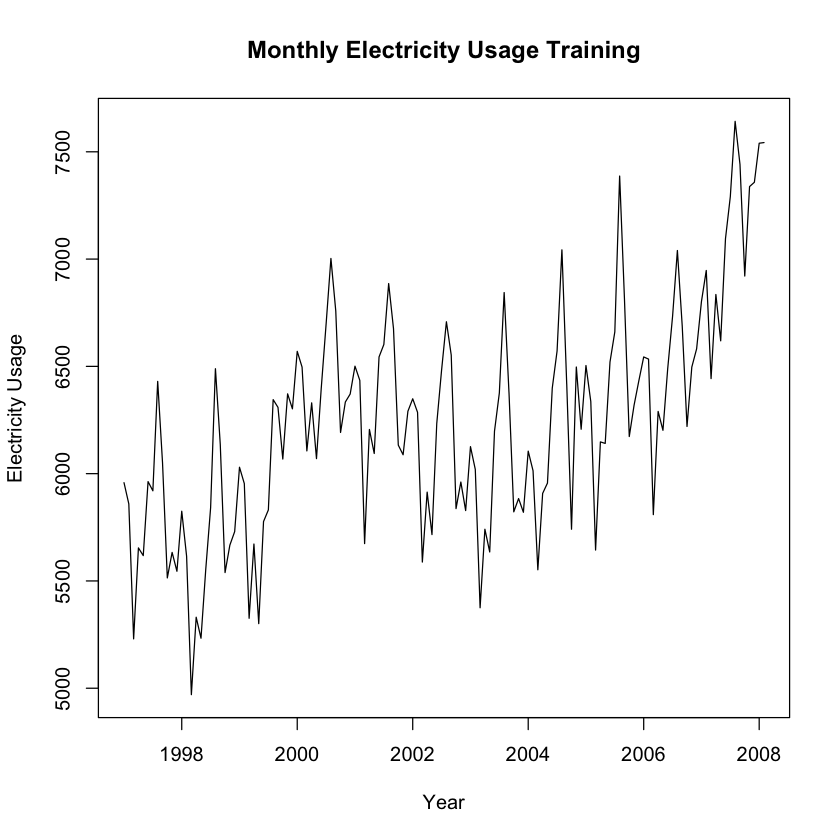

In [14]:
# plotting the training set's time plot to see the underlying trend and patterns
plot(train_ts, xlab = "Year", ylab = "Electricity Usage", main = "Monthly Electricity Usage Training")

In [18]:
# Performing ADF test to check for stationarity to see if differencing is needed
library(tseries)
adf.test(train_ts, alternative = "stationary")


	Augmented Dickey-Fuller Test

data:  train_ts
Dickey-Fuller = -2.7943, Lag order = 5, p-value = 0.2461
alternative hypothesis: stationary


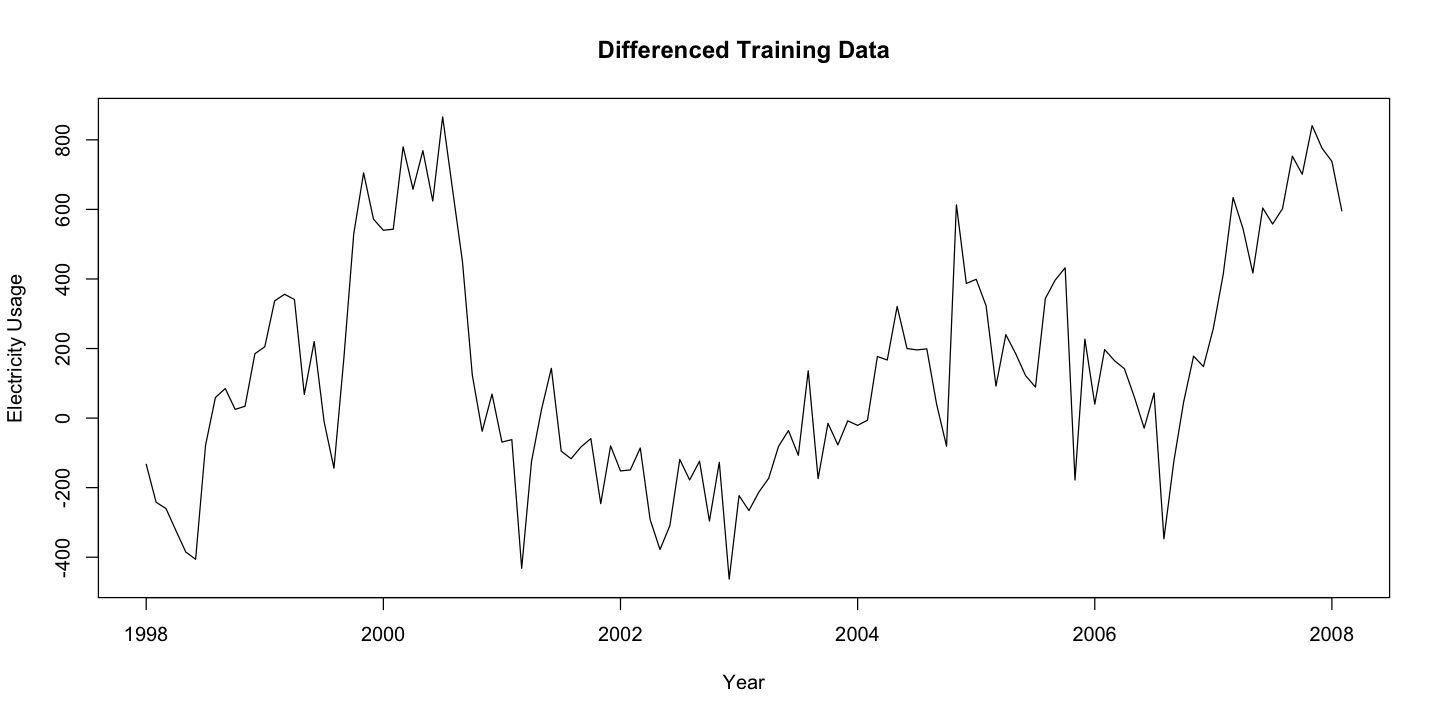

In [109]:
# Differencing the data since the ADF shows that it's non-stationary and that the original time plot shows seasonality every 12 months
diff_train <- diff(train_ts, lag = 12)
plot(diff_train, xlab = "Year", ylab = "Electricity Usage", main = "Differenced Training Data")

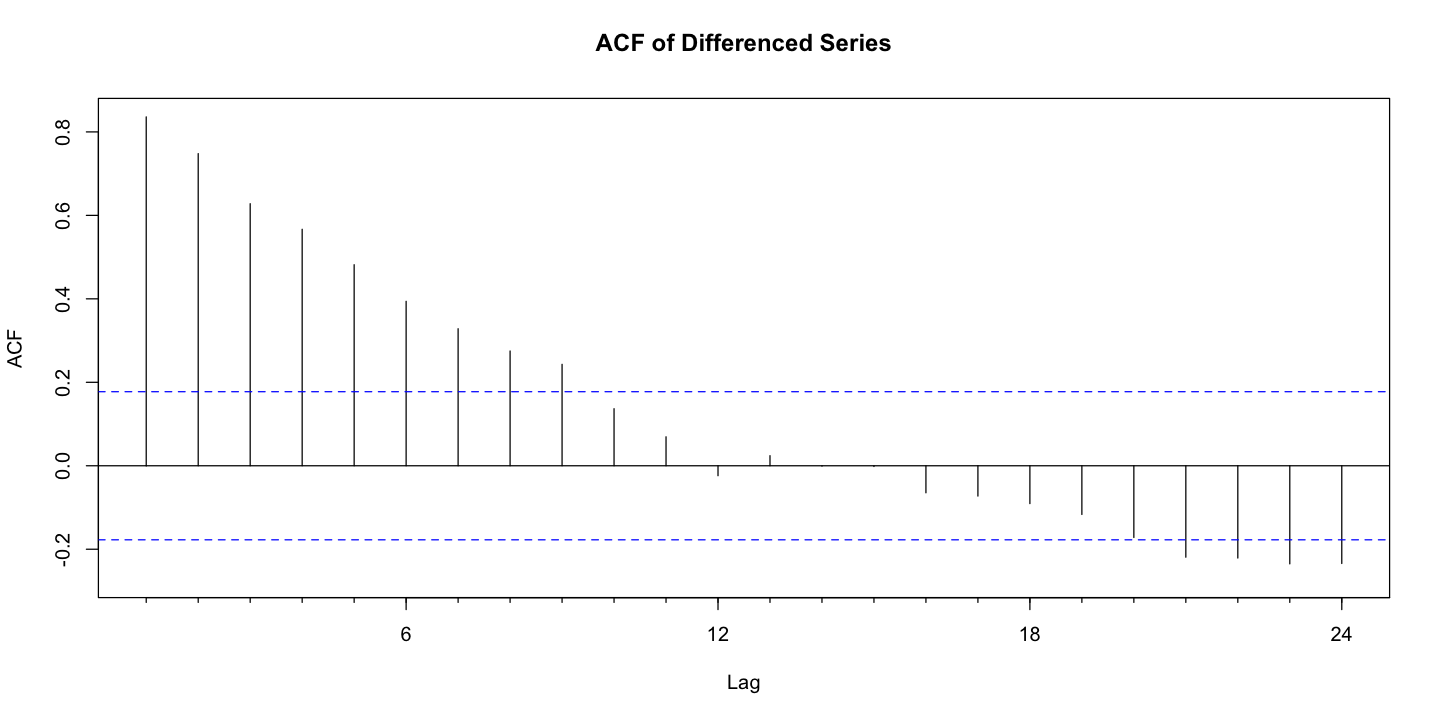

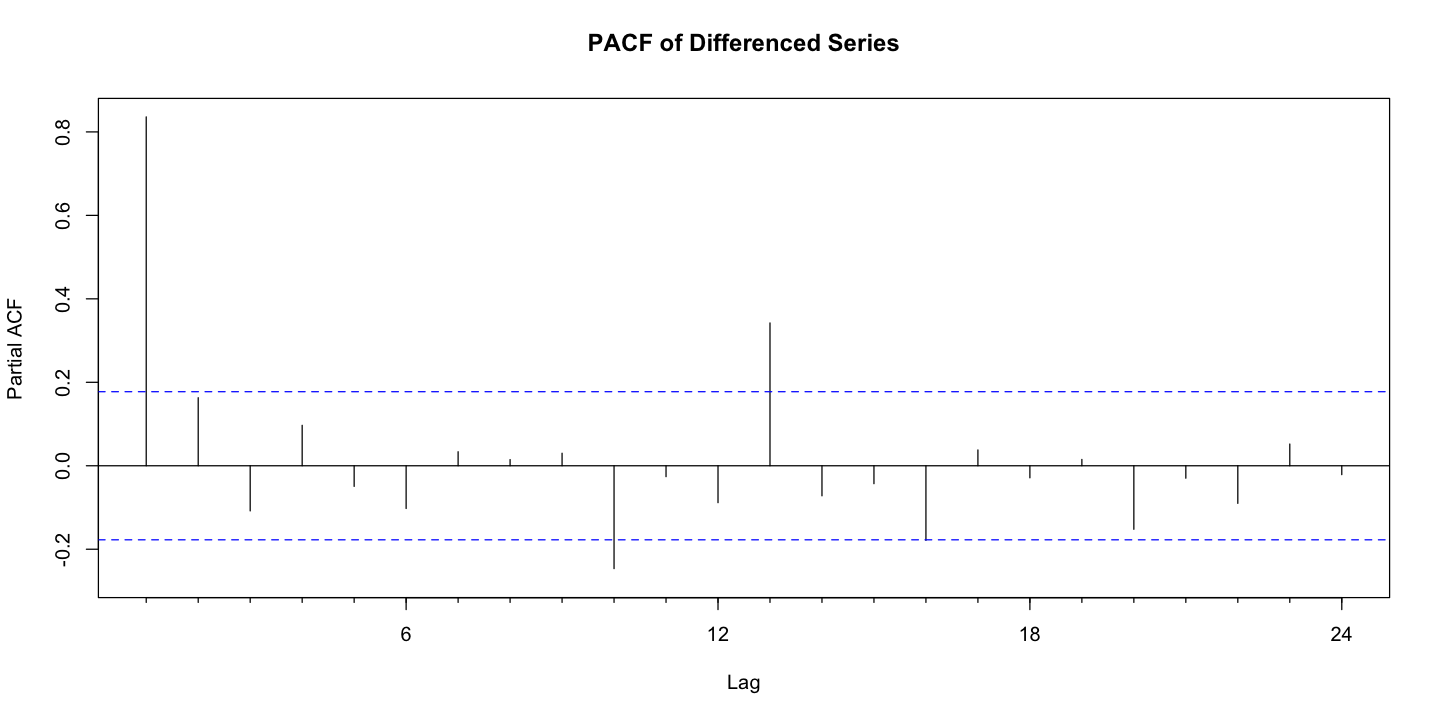

In [111]:
# Plot ACF and PACF for the differenced data
Acf(diff_train, main="ACF of Differenced Series")
Pacf(diff_train, main="PACF of Differenced Series")

#### Interpreting ACF and PACF
The acf shows significant spikes initially that taper off, which is indicative of a mixture of AR and MA components. The significance at lag 24 indicates some seasonal effects. The pacf displays a sharp cut-off after the first lag, with a significant spike at lag 1 and noticable spike at lags 10 and 13, suggesting potential AR compoenets at these lags.

In [32]:
# the first model we decided to test is an arima (1,1,1)x(1,1,1)12. This model is selected as it contains both non-seasonal and seasonal
# components for AR and MA, since we observed significant correlations at the first lag in both the ACF and the PACF, and that the 
# differencing of the data was taken at lag 12
arima_training_1 <- Arima(train_ts, order = c(1,1,1), seasonal = list(order = c(1,1,1), period = 12))

In [34]:
# we will now check the performance of this model
summary(arima_training_1)

Series: train_ts 
ARIMA(1,1,1)(1,1,1)[12] 

Coefficients:
          ar1      ma1    sar1     sma1
      -0.0848  -0.1342  0.1592  -0.9999
s.e.   0.6710   0.6761  0.0985   0.1577

sigma^2 = 17372:  log likelihood = -773.01
AIC=1556.01   AICc=1556.53   BIC=1569.99

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.695312 123.1586 89.60404 0.1292107 1.425733 0.3299437
                    ACF1
Training set -0.00560818

In [38]:
# the second model selected is the arima (0,1,1)x(1,1,1)12. This is because this model has non seasonal MA, which helps to correct the 
# forecast error shown in the lag effects in the ACF. The seasonal AR and MA are used to capture the yearly patterns
arima_training_2 <- Arima(train_ts, order = c(0,1,1), seasonal = list(order = c(1,1,1), period = 12))

In [44]:
# checking the performance of this model as well
summary(arima_training_2)

Series: train_ts 
ARIMA(0,1,1)(1,1,1)[12] 

Coefficients:
          ma1    sar1     sma1
      -0.2178  0.1583  -1.0000
s.e.   0.0897  0.0981   0.1566

sigma^2 = 17223:  log likelihood = -773.02
AIC=1554.03   AICc=1554.38   BIC=1565.21

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 9.910831 123.1535 89.73239 0.1321079 1.42775 0.3304163
                     ACF1
Training set -0.008261583

In [103]:
# the third method is to use the auto arima model to see if the best model found by this approach has improved performance compared to the 
# models we manually selected.
auto_training <- auto.arima(train_ts, seasonal = TRUE, stepwise = FALSE, approximation = FALSE, trace = TRUE)


 ARIMA(0,1,0)(0,1,0)[12]                    : 1601.561
 ARIMA(0,1,0)(0,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,2)[12]                    : Inf
 ARIMA(0,1,0)(1,1,0)[12]                    : 1578.215
 ARIMA(0,1,0)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(1,1,2)[12]                    : Inf
 ARIMA(0,1,0)(2,1,0)[12]                    : 1577.314
 ARIMA(0,1,0)(2,1,1)[12]                    : Inf
 ARIMA(0,1,0)(2,1,2)[12]                    : Inf
 ARIMA(0,1,1)(0,1,0)[12]                    : 1594.507
 ARIMA(0,1,1)(0,1,1)[12]                    : Inf
 ARIMA(0,1,1)(0,1,2)[12]                    : Inf
 ARIMA(0,1,1)(1,1,0)[12]                    : 1574.639
 ARIMA(0,1,1)(1,1,1)[12]                    : Inf
 ARIMA(0,1,1)(1,1,2)[12]                    : Inf
 ARIMA(0,1,1)(2,1,0)[12]                    : 1572.219
 ARIMA(0,1,1)(2,1,1)[12]                    : Inf
 ARIMA(0,1,1)(2,1,2)[12]                    : Inf
 ARIMA(0,1,2)(0,1,0)[12]                    : 1596.608
 ARIMA(0,1,2)(

In [42]:
# looking at the summary of the auto arima model, we can directly compare its performance to the two models above
summary(auto_training)

Series: train_ts 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1995  -0.8817
s.e.   0.0896   0.1593

sigma^2 = 18675:  log likelihood = -774.34
AIC=1554.67   AICc=1554.88   BIC=1563.06

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.568535 128.7793 93.54701 0.1267621 1.486403 0.3444626
                    ACF1
Training set -0.01099196

#### model selection
Looking at the error measures of the three models, model 2 outperforms the auto arima model. Models 1 and 2 have very similar error measures, but model 2 has lower AIC and BIC, indicating model 2 may be more efficient in balancing model complexity and fit. Therefore model 2 arima (0,1,1)x(1,1,1)12 is chosen as the best model.